# Machine Learning Project : Personal Loan Campaign

### Problem Statement

How do we build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan. How do we evaluate the performance of such a model?


### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.


### **Data Dictionary**

- **ID**: Customer ID  
- **Age**: Customer’s age in completed years  
- **Experience**: # years of professional experience  
- **Income**: Annual income of the customer (in thousand dollars)  
- **ZIP Code**: Home Address ZIP code  
- **Family**: The family size of the customer  
- **CCAvg**: Average spending on credit cards per month (in thousand dollars)  
- **Education**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
- **Mortgage**: Value of house mortgage if any. (in thousand dollars)  
- **Personal_Loan**: Did this customer accept the personal loan offered in the last campaign?  
- **Securities_Account**: Does the customer have a securities account with the bank?  
- **CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank?  
- **Online**: Do customers use Internet banking facilities?  
- **CreditCard**: Does the customer use a credit card issued by any other Bank (excluding All Life Bank)?


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV

# To build model for prediction
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

### Reading Input File

In [2]:
loan_df = pd.read_csv("Loan_Modelling.csv")

In [3]:
loan_df.head(5)

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Understanding the structure of the data

In [5]:
# Write your code here
print(f"There are {loan_df.shape[0]} rows and {loan_df.shape[1]} columns in the dataset.")

There are 5000 rows and 14 columns in the dataset.


#### Observations:

* There are 1898 rows and 9 columns in the dataset.

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations:

| #  | Column              | Non-Null Count | Datatype |
|----|---------------------|----------------|----------|
| 0  | ID                  | 5000 non-null  | int64    |
| 1  | Age                 | 5000 non-null  | int64    |
| 2  | Experience          | 5000 non-null  | int64    |
| 3  | Income              | 5000 non-null  | int64    |
| 4  | ZIPCode             | 5000 non-null  | int64    |
| 5  | Family              | 5000 non-null  | int64    |
| 6  | CCAvg               | 5000 non-null  | float64  |
| 7  | Education           | 5000 non-null  | int64    |
| 8  | Mortgage            | 5000 non-null  | int64    |
| 9  | Personal_Loan       | 5000 non-null  | int64    |
| 10 | Securities_Account  | 5000 non-null  | int64    |
| 11 | CD_Account          | 5000 non-null  | int64    |
| 12 | Online              | 5000 non-null  | int64    |
| 13 | CreditCard          | 5000 non-null  | int64    |

---

The 14 columns are divided into 2 different data types:

- **int64** (13 columns):  
  `ID`, `Age`, `Experience`, `Income`, `ZIPCode`, `Family`, `Education`, `Mortgage`, `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard`

- **float64** (1 column):  
  `CCAvg`

---

**Notes:**
- `ID` and `ZIPCode` are identifier/location variables and should be treated as categorical in nature.
- Columns such as `Personal_Loan`, `Securities_Account`, `CD_Account`, `Online`, and `CreditCard` are binary categorical variables.
- `Education` may represent ordinal categories and can be handled accordingly in analysis.


In [7]:
# Write your code here
# Preliminary assessment to check for null values
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Observation: 

There are no null values

In [8]:
loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# Check for duplicated values
loan_df.duplicated().sum()
loan_df.loc[loan_df.duplicated()]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

#### Observation: 

There are no duplicated values

#### Statistica Summary

In [10]:
loan_df.describe(include="all").T

count        mean        std         min         25%  \
ID                 5000.00000  2500.50000 1443.52000     1.00000  1250.75000   
Age                5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income             5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.70000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           50%         75%         max  
ID                  2500.50000  3750.25000  5000.00000  
Age                   45.00000    55.00000    67.00000  
Experience            20.00000    30.00000    43.00000  
Income                64.00000    98.00000   224.00000  
ZIPCode            93437.00000 94608.00000 96651.00000  
Family                 2.00000     3.00000     4.00000  
CCAvg                  1.50000     2.50000    10.00000  
Education              2.00000     3.00000     3.00000  
Mortgage               0.00000   101.00000   635.00000  
Personal_Loan          0.00000     0.00000     1.00000  
Securities_Account     0.00000     0.00000     1.00000  
CD_Account             0.00000     0.00000     1.00000  
Online                 1.00000     1.00000     1.00000  
CreditCard             0.00000     1.00000     1.00000

## Exploratory Data Analysis (EDA)


### Univariate Analysis

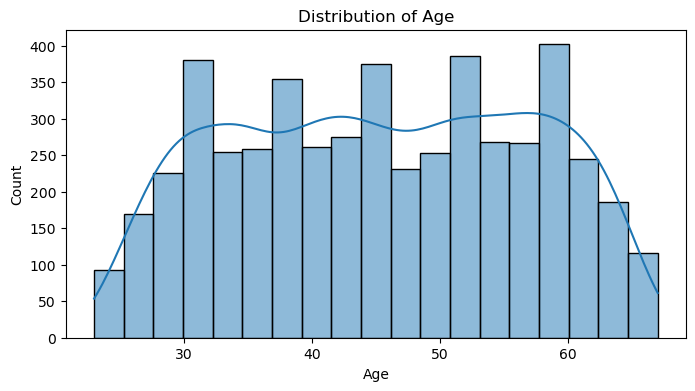

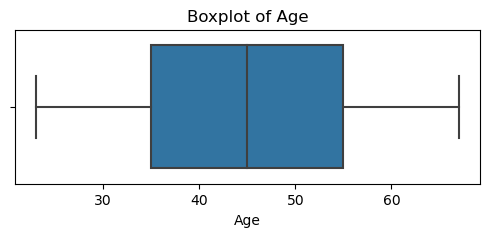

In [11]:
## Age
plt.figure(figsize=(8,4))
sns.histplot(loan_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=loan_df['Age'])
plt.title('Boxplot of Age')
plt.show()


#### Observations:

* This plot shows the frequency of ages with a KDE (Kernel Density Estimate) overlay to represent the distribution curve.

* Age appears to be mostly between 25 and 65 years.

* The KDE curve indicates a fairly uniform distribution with mild peaks, not heavily skewed.

* Median (Q2) is around 45.

* Interquartile Range (IQR) spans roughly from 37 to 58.

* Minimum is around 25 and maximum around 65.

* There appear to be no significant outliers, as no individual points are plotted outside the whiskers.



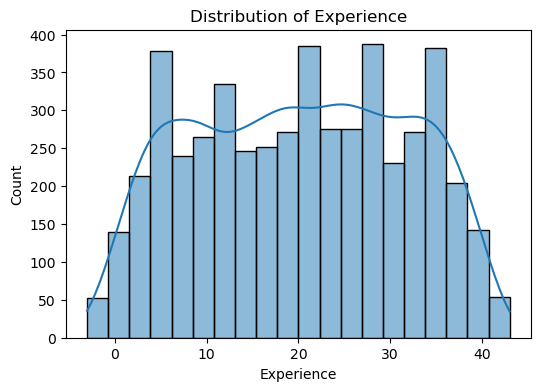

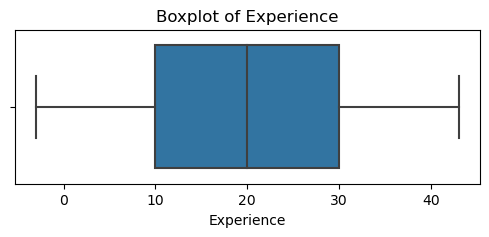

In [12]:
## Experience
plt.figure(figsize=(6,4))
sns.histplot(loan_df['Experience'], kde=True)
plt.title('Distribution of Experience')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=loan_df['Experience'])
plt.title('Boxplot of Experience')
plt.show()


### Observation

* Range: The experience values range from 0 to around 45 years.

* Shape: The distribution is relatively uniform, with some fluctuations.

* There’s no strong skew — the data appears somewhat evenly spread across bins.

* Peaks: Slight peaks are visible around the 5, 15, 25, and 35 years mark.

* DE Line (Smoothed Curve): The Kernel Density Estimate line is not perfectly smooth, suggesting a multimodal distribution (multiple local peaks).

* Spread:The interquartile range (IQR) appears to lie approximately between 10 and 35 years.

* Median: The median (Q2) is around 20 years.

* Whiskers: The lower whisker is near 0, and the upper whisker extends to ~45.

* Outliers: There are no extreme outliers in this boxplot; the whiskers cover the entire range.


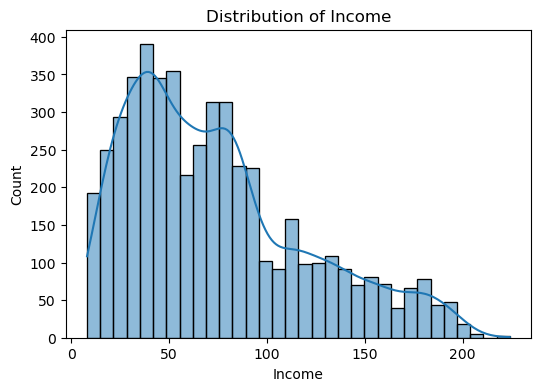

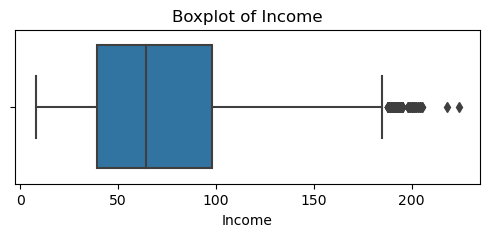

In [13]:
## Income
plt.figure(figsize=(6,4))
sns.histplot(loan_df['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=loan_df['Income'])
plt.title('Boxplot of Income')
plt.show()



### Observation:

* Skewness: The distribution is right-skewed (positively skewed) — most values are concentrated on the lower end, with a long tail extending toward higher incomes.

* Peak: A high concentration of income values lies between 30 to 70 units.

* Spread: While many individuals earn less than 100 units, there are values extending well beyond 200 units, but they are less frequent.

* IQR (Box):The interquartile range spans approximately 40 to 110 units.

* This is where the middle 50% of income values lie.

* Median: The median income is around 70–75 units, indicating that half of the data lies below this value.

* Whiskers:The whiskers stretch roughly from 10 to 160, showing the range of typical values.

* Outliers:There are several outliers beyond 160, shown as black dots. These are unusually high incomes compared to the rest.

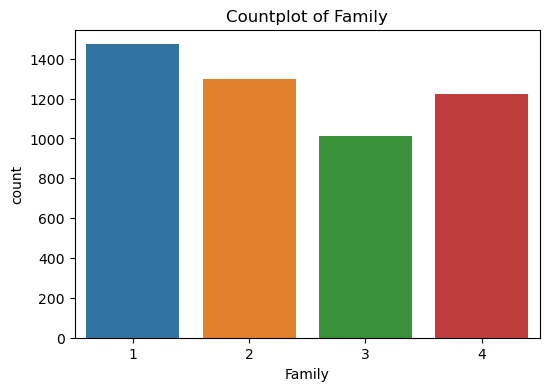

In [14]:
# Family
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['Family'])
plt.title('Countplot of Family')
plt.show()



### Observation:

#### Most common family size:

* Family size 1 is the most frequent, with over 1,400 individuals.

#### Next common sizes:

* Family sizes 2 and 4 follow closely, both with counts over 1,200.

#### Least common size:

* Family size 3 has the lowest frequency, around 1,000.

#### Nature of the variable:

* This is a categorical variable (discrete values: 1, 2, 3, 4).

* It may be used as-is in models via encoding (e.g., one-hot or ordinal encoding), or dropped if not important.

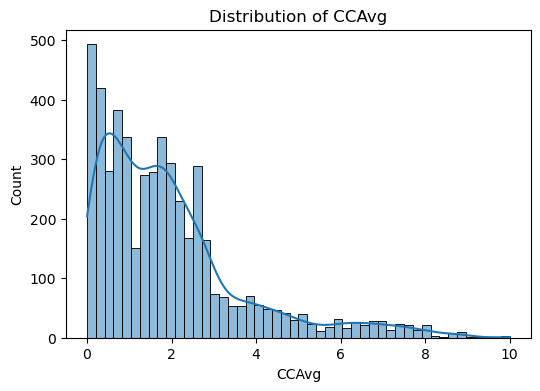

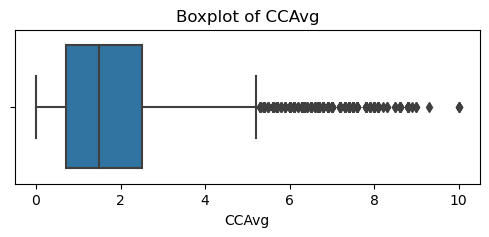

In [15]:
# CCAvg
plt.figure(figsize=(6,4))
sns.histplot(loan_df['CCAvg'], kde=True)
plt.title('Distribution of CCAvg')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=loan_df['CCAvg'])
plt.title('Boxplot of CCAvg')
plt.show()


### Observations:

#### Shape:

* The distribution is right-skewed (positively skewed).

* This means most people spend less on average using credit cards, with fewer individuals spending higher amounts.

#### Concentration:

* A large number of observations fall between 0 to 2.5 (likely in $000s/month).

* Very few individuals have average spends greater than 5, indicating a long right tail.


#### Spread:

* The interquartile range (IQR) appears to be between ~0.5 and ~2.5.

* The median is slightly below 2.

#### Outliers:

* A significant number of outliers (dots to the right) indicate unusually high spenders.


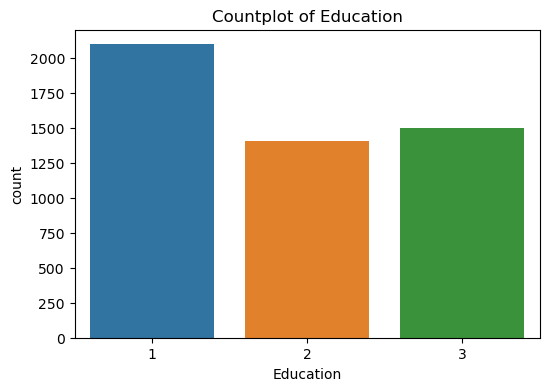

In [16]:
## Education
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['Education'])
plt.title('Countplot of Education')
plt.show()

### Observation:

* Categorical Distribution:The education variable has 3 categories: 1, 2, and 3. These are likely encoded values representing levels of education (e.g., High School, Graduate, Postgraduate).

* Dominant Category:Category 1 has the highest number of individuals, suggesting that the largest group has the lowest education level (assuming 1 = lowest).

* Other Categories:Categories 2 and 3 have comparable frequencies, but both are significantly lower than category 1.

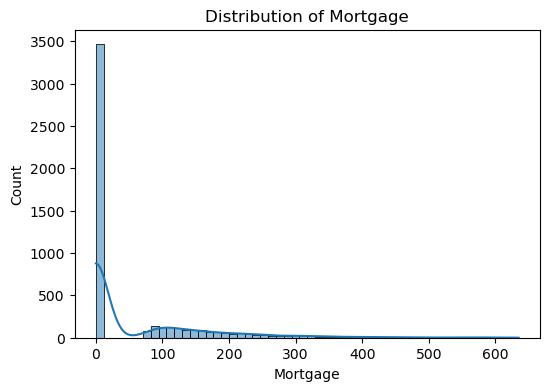

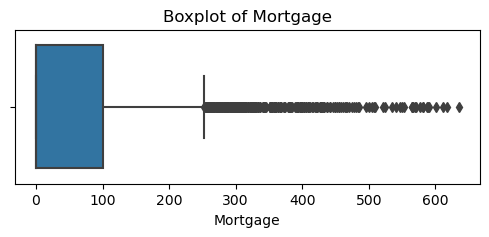

In [17]:
## Mortgage
plt.figure(figsize=(6,4))
sns.histplot(loan_df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x=loan_df['Mortgage'])
plt.title('Boxplot of Mortgage')
plt.show()

### Observation:

#### Highly Right-Skewed Distribution:

* Most individuals have low or zero mortgage amounts.

* There's a sharp peak near 0, indicating a large proportion of the population doesn't have a mortgage.

#### Long Tail with Outliers:

* The distribution stretches far to the right (values above 100, even exceeding 600).

* The boxplot confirms many outliers, representing individuals with unusually high mortgage values.

#### Zero or Very Low Mortgages Are Common:

* Suggests either many renters or homeowners without mortgage obligations.

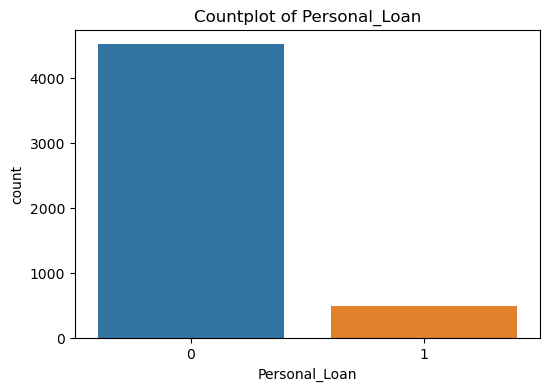

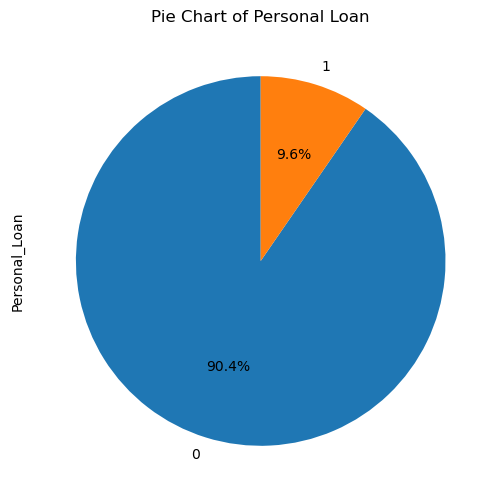

In [18]:
# Personal_Loan
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['Personal_Loan'])
plt.title('Countplot of Personal_Loan')
plt.show()

plt.figure(figsize=(6,6))
loan_df['Personal_Loan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Personal Loan')

plt.show()




### Observation:

#### Binary Classification Target:

* The variable has two classes:

    * 0 (Did not accept personal loan)

    * 1 (Accepted personal loan)

#### Class Imbalance:

* A significant imbalance is evident:

* 90.4% of customers did not accept a personal loan.

* Only 9.6% accepted a personal loan.

* This imbalance can negatively impact classification models if not handled properly.

#### Requires Special Handling:

* Techniques like SMOTE, undersampling, or class-weight adjustment may be needed during model training to avoid bias toward the majority class.

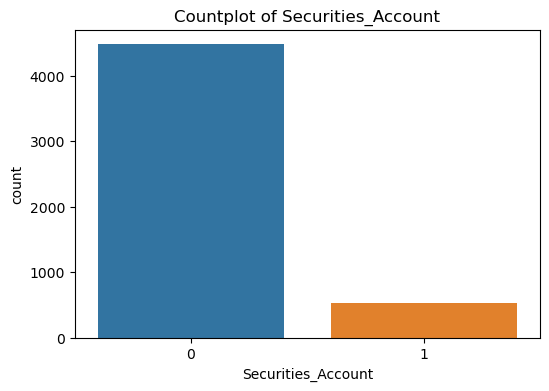

In [19]:
## Securities_Account
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['Securities_Account'])
plt.title('Countplot of Securities_Account')
plt.show()

### Observation:

* Binary Feature:

    * 0 = Customer does not have a securities account

    * 1 = Customer has a securities account

* Class Distribution:

    * The vast majority of customers (~90%) do not have a securities account.

    * Only a small minority (~10%) have a securities account.

* Skewed Distribution:

    * This feature is highly imbalanced, with most values being 0.



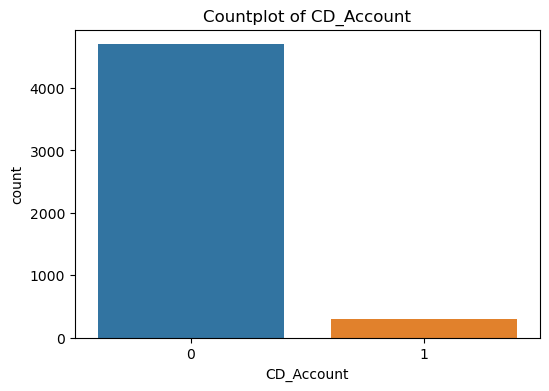

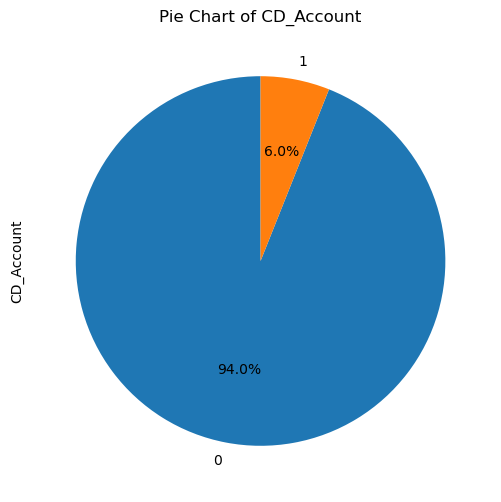

In [20]:
## CD_Account
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['CD_Account'])
plt.title('Countplot of CD_Account')
plt.show()


plt.figure(figsize=(6,6))
loan_df['CD_Account'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of CD_Account')

plt.show()


### Observation:

* Binary Feature:

    * 0 = Customer does not hold a Certificate of Deposit (CD) account

    * 1 = Customer holds a CD account

* Class Distribution:

    * 94% of customers do not have a CD account.

    * Only 6% of customers do have a CD account.

* Highly Imbalanced:

    * This feature is extremely skewed toward customers not holding CD accounts.

    * Might require special handling (e.g., feature engineering or balancing) if used in modeling.

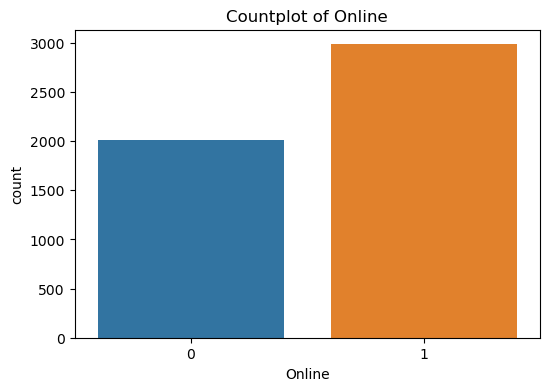

In [21]:
## Online
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['Online'])
plt.title('Countplot of Online')
plt.show()


#### Observtion:

* The image displays a countplot visualizing the distribution of the 'Online' feature from a loan dataset (loan_df['Online']).

* X-axis: Represents the 'Online' feature, with two categories: 0 and 1. These likely represent whether a loan application was submitted offline (0) or online (1).
* Y-axis: Represents the 'count' of loan applications for each category.
* Bar Heights:
    * The bar corresponding to '0' (Offline) has a height of approximately 2000. This indicates that there are around 2000 loan applications submitted offline.
    * The bar corresponding to '1' (Online) has a height of approximately 3000. This indicates that there are around 3000 loan applications submitted online.

* There are significantly more loan applications submitted online (approximately 3000) compared to those submitted offline (approximately 2000) in this dataset. Online submissions appear to be the more prevalent method for loan applications.

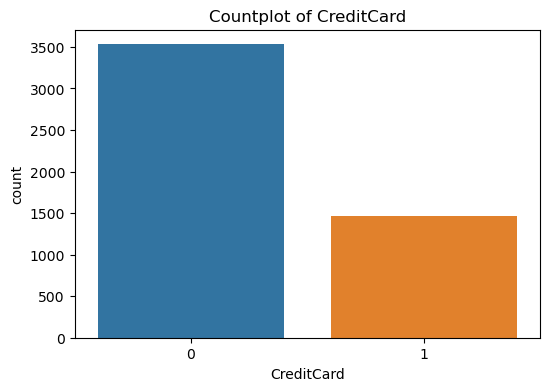

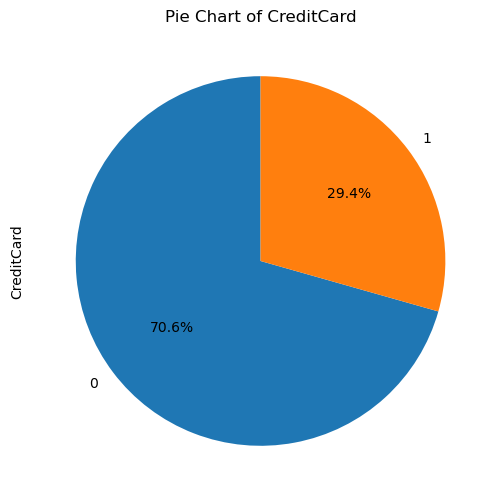

In [22]:
# CreditCard
plt.figure(figsize=(6,4))
sns.countplot(x=loan_df['CreditCard'])
plt.title('Countplot of CreditCard')
plt.show()


plt.figure(figsize=(6,6))
loan_df['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of CreditCard')

plt.show()


### Observation:

#### Countplot of CreditCard:

* X-axis: Represents the 'CreditCard' feature, with two categories: 0 and 1. These likely indicate whether a customer has a credit card (1) or not (0).
* Y-axis: Represents the 'count' of customers in each category.

#### Bar Heights:
* The bar corresponding to '0' (No Credit Card) has a height of approximately 3000. This indicates that around 3000 customers in the dataset do not have a credit card.
* The bar corresponding to '1' (Has Credit Card) has a height of approximately 1500. This indicates that around 1500 customers in the dataset have a credit card.

#### Pie Chart of CreditCard:

* The pie chart visually represents the proportion of each category in the 'CreditCard' feature.
* The slice corresponding to '0' (No Credit Card) is significantly larger and is labeled with approximately 70.6%.
* The slice corresponding to '1' (Has Credit Card) is smaller and is labeled with approximately 29.4%.

#### Overall Key Observation:

* The observation explicitly stated in the code comment is supported by both plots: "Slightly more customers without credit cards."

* Specifically, the data shows that approximately twice as many customers in this loan dataset do not have a credit card compared to those who do. The countplot shows roughly 3000 vs. 1500, and the pie chart shows approximately 70.6% vs. 29.4%

## Bivariate & Multivariate Analysis

In [23]:
colors = ['#1f77b4', '#ff7f0e']

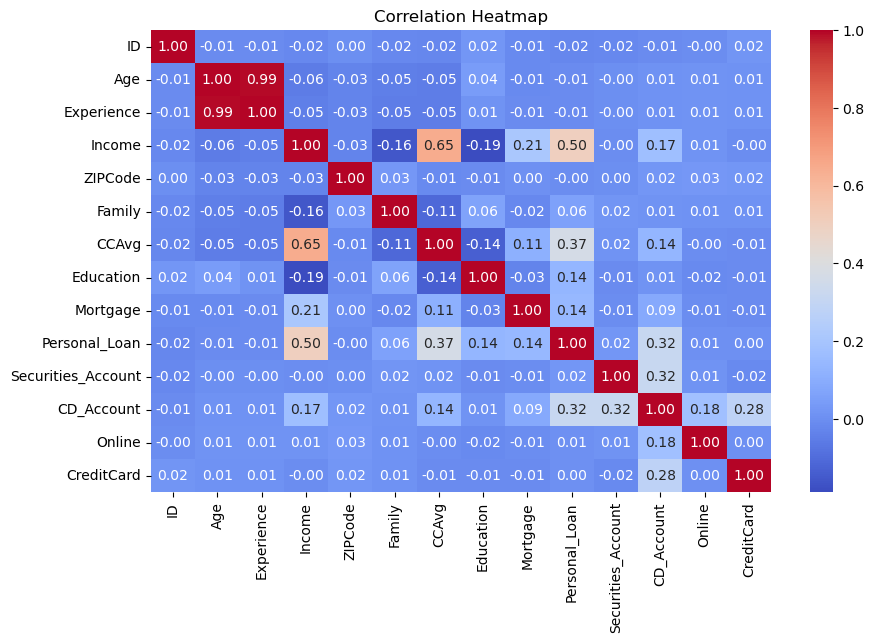

In [24]:
# Write the code here
loan_df.head()
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(loan_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Observation:

#### Observations from the Correlation Heatmap:

* This heatmap visualizes the pairwise correlations between different numerical features in the loan_df dataset. The color intensity and the numerical values within each cell indicate the strength and direction of the correlation.

* Strong Positive Correlations (Values close to +1, reddish colors):

* Age and Experience (0.99): There is a very strong positive correlation between the age of the applicant and their years of experience. This is expected as older individuals tend to have more work experience.
* CCAvg and Income (0.65): There is a moderate positive correlation between the customer's average credit card spending per month (CCAvg) and their income. Higher income individuals tend to have higher credit card spending.
* Mortgage and Income (0.50): There is a moderate positive correlation between whether the customer has a mortgage and their income. Homeowners with mortgages tend to have higher incomes.
* CD_Account and Securities_Account (0.32): There is a weak positive correlation between having a Certificate of Deposit (CD) account and having a securities account.
* Personal_Loan and CCAvg (0.37): There is a weak positive correlation between taking out a personal loan and the average credit card spending.
* Personal_Loan and Income (0.61): There is a moderate positive correlation between taking out a personal loan and income. Higher income individuals might be more likely to qualify for or need personal loans.
* CD_Account and Personal_Loan (0.17): There is a very weak positive correlation between having a CD account and taking out a personal loan.
* Online and CD_Account (0.18): There is a very weak positive correlation between applying online and having a CD account.
* Online and CreditCard (0.28): There is a weak positive correlation between applying online and having a credit card.
* Strong Negative Correlations (Values close to -1, bluish colors):

* There are no strong negative correlations observed in this heatmap. The negative correlation values are generally weak (close to 0).


* Weak Correlations (Values close to 0, lighter colors):

* Most other pairs of features show weak correlations, indicating a limited linear relationship between them. For example, the correlation between 'ID' and most other features is very close to zero, as 'ID' is likely just an identifier.
* Features like 'ZIPCode', 'Family', 'Education', 'Mortgage' (with most other features), 'Personal_Loan' (with some features), 'Securities_Account' (with most other features), 'CD_Account' (with most other features), 'Online' (with most other features), and 'CreditCard' (with most other features) generally exhibit weak correlations.


#### Key Takeaways:

* Age and Experience are highly related.
* Income has a noticeable positive relationship with CCAvg and Mortgage.
* Taking a personal loan shows some positive association with Income and CCAvg.
* Most other features have relatively weak linear relationships with each other.
* This correlation heatmap helps in understanding the linear dependencies between the numerical variables in the loan dataset, which can be useful for feature selection, model building, and gaining insights into the data.

In [25]:
loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

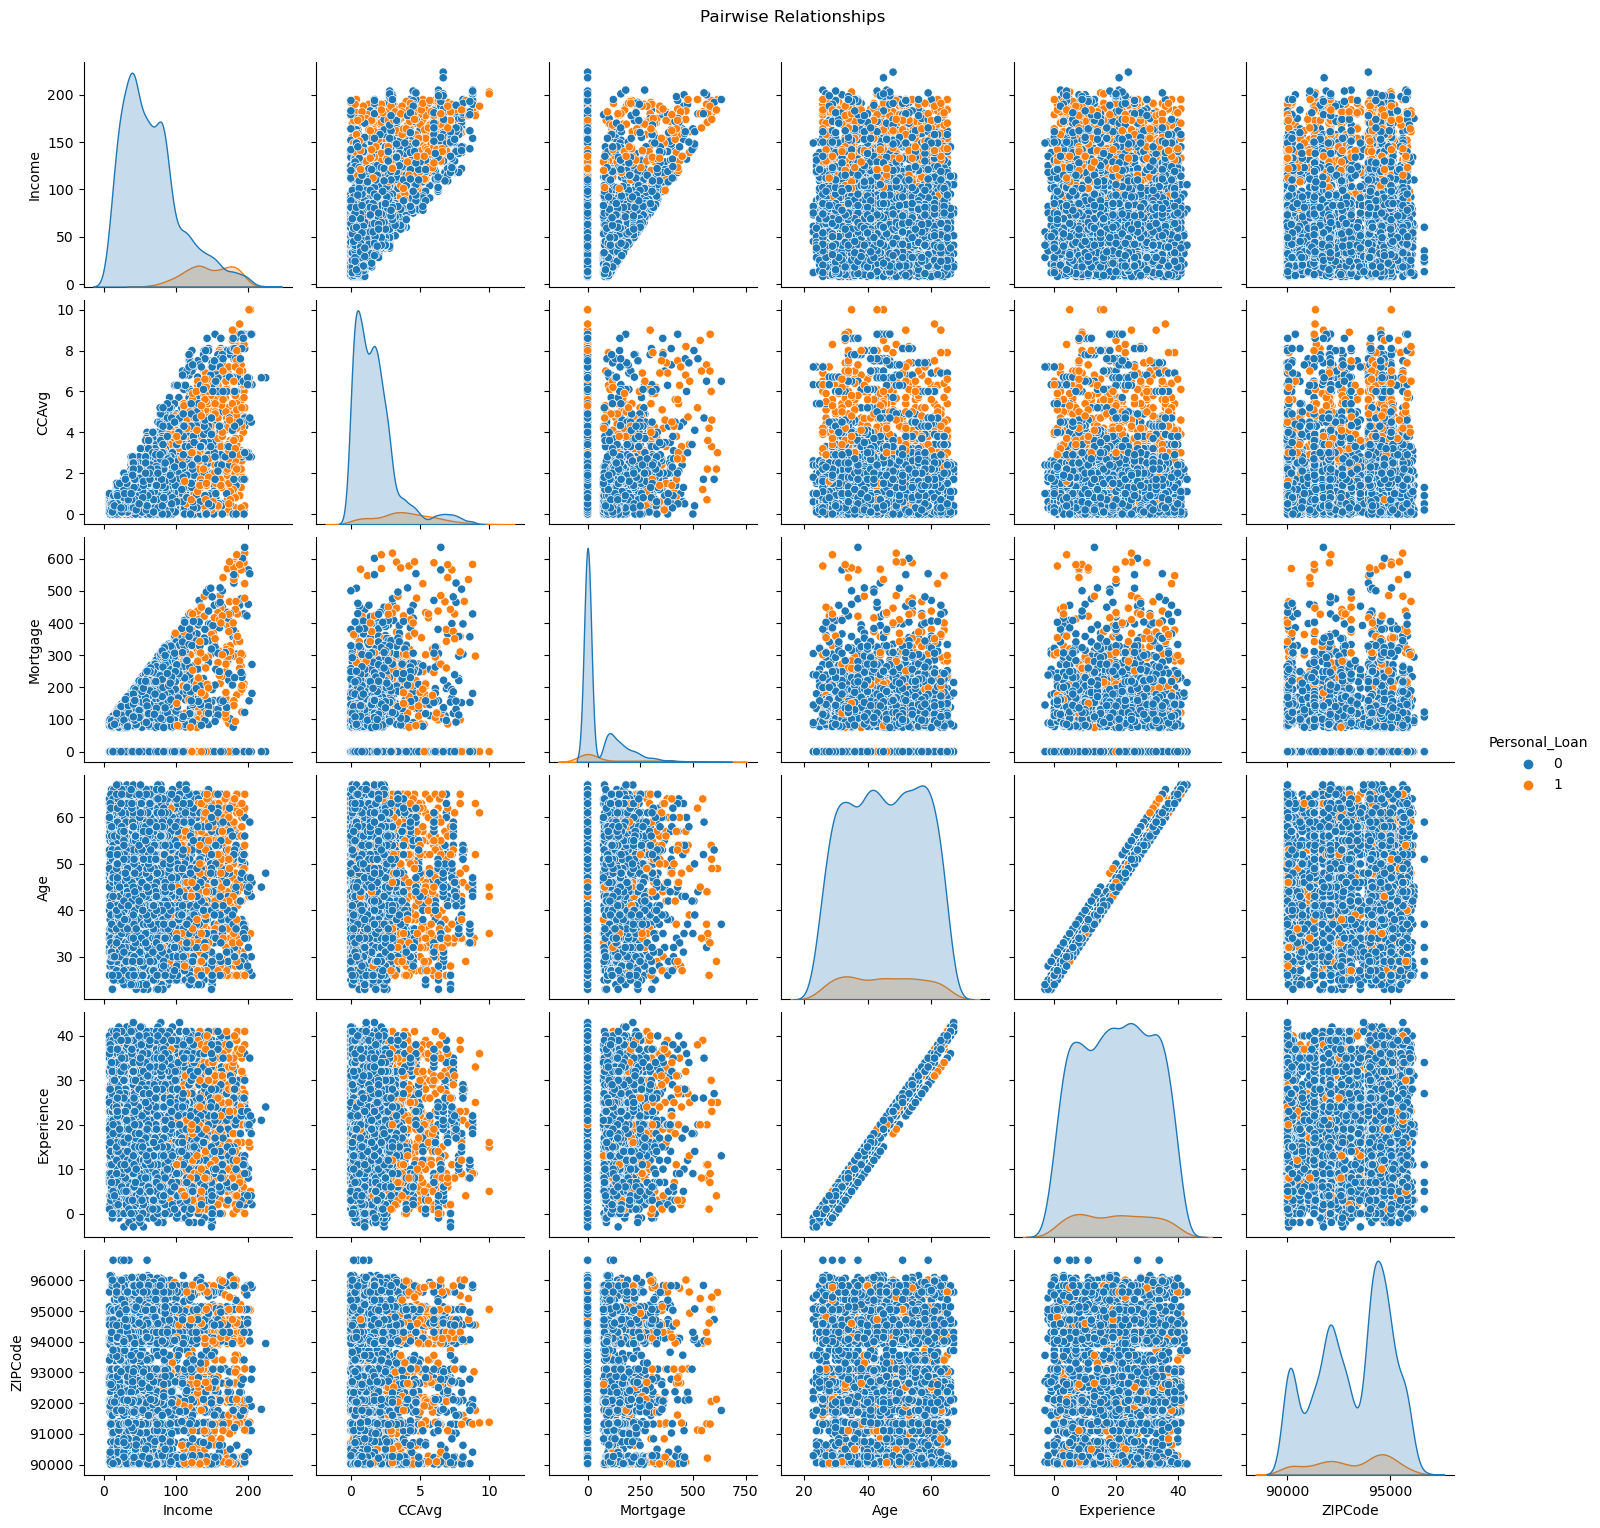

In [26]:
# Code for pair plot
sns.pairplot(loan_df[["Income", "CCAvg", "Mortgage", "Age", "Experience", "ZIPCode","Personal_Loan"]], 
             hue='Personal_Loan', palette=colors)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

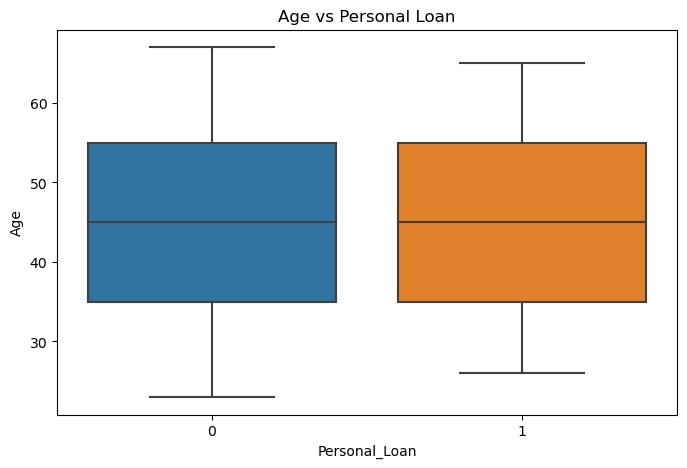

In [27]:
# Age vs Personal_Loan
plt.figure(figsize=(8,5))
sns.boxplot(x='Personal_Loan', y='Age', data=loan_df, palette=colors)
plt.title('Age vs Personal Loan')
plt.show()


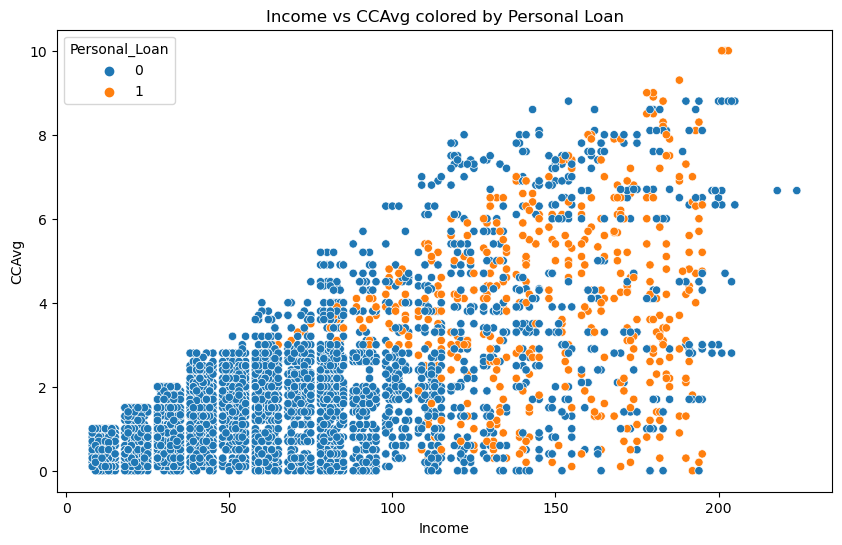

In [28]:
# Relationship: Income vs CCAvg vs Personal Loan
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='CCAvg', hue='Personal_Loan', data=loan_df, palette=colors)
plt.title('Income vs CCAvg colored by Personal Loan')
plt.show()


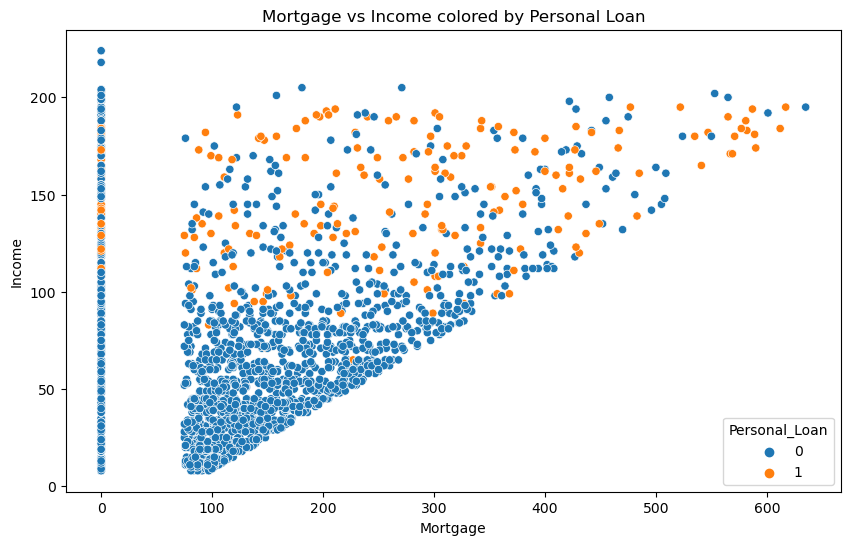

In [29]:
# Mortgage vs Income vs Loan Acceptance
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mortgage', y='Income', hue='Personal_Loan', data=loan_df, palette=colors)
plt.title('Mortgage vs Income colored by Personal Loan')
plt.show()


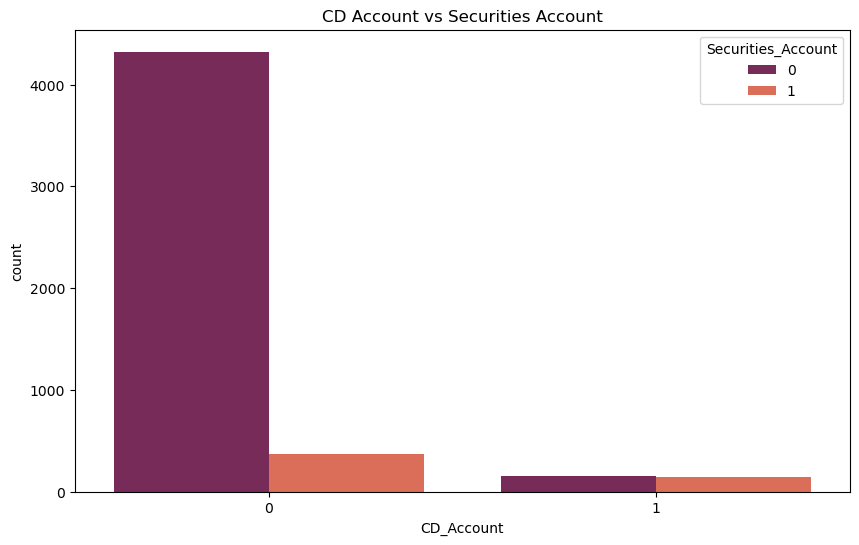

In [30]:
# CD_Account and Securities_Account combined impact
plt.figure(figsize=(10,6))
sns.countplot(x='CD_Account', hue='Securities_Account', data=loan_df, palette='rocket')
plt.title('CD Account vs Securities Account')
plt.show()

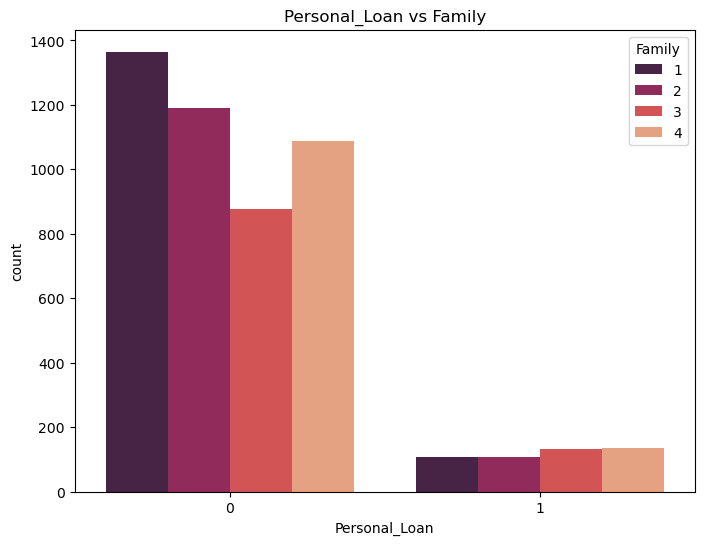

In [31]:
# CD_Account and Securities_Account combined impact
plt.figure(figsize=(8,6))
sns.countplot(x='Personal_Loan', hue='Family', data=loan_df, palette='rocket')
plt.title('Personal_Loan vs Family')
plt.show()

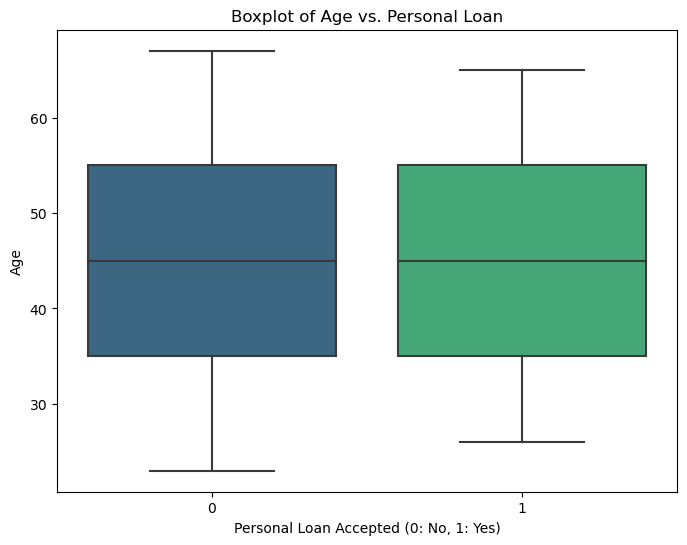

In [32]:
# Age vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=loan_df, palette='viridis')
plt.title('Boxplot of Age vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

### Observation:

* Observation: The age distribution of customers who accepted the personal loan is very similar to those who did not.  There's no clear difference in the median or spread.


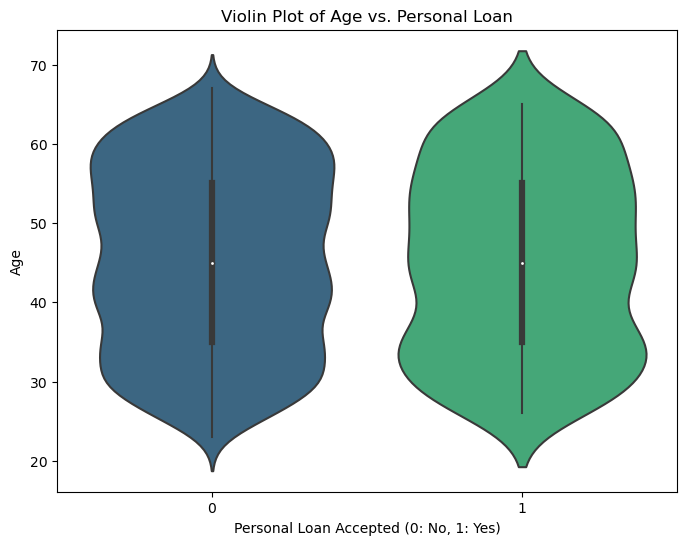

In [33]:
# Age vs. Personal_Loan (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Personal_Loan', y='Age', data=loan_df, palette='viridis')
plt.title('Violin Plot of Age vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()


### Observation: 

* The violin plot confirms the boxplot observation. The shape of the distributions for both groups is quite alike, suggesting age is not a strong differentiator for personal loan acceptance.


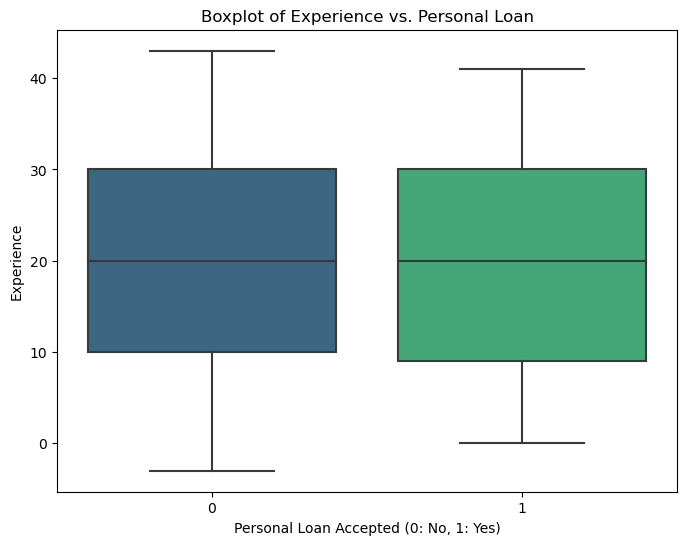

In [34]:
# Experience vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Experience', data=loan_df, palette='viridis')
plt.title('Boxplot of Experience vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Experience')
plt.show()

#### Observation:

* Similar to age, the distribution of experience is also very similar for both groups.  The median and interquartile range are close.


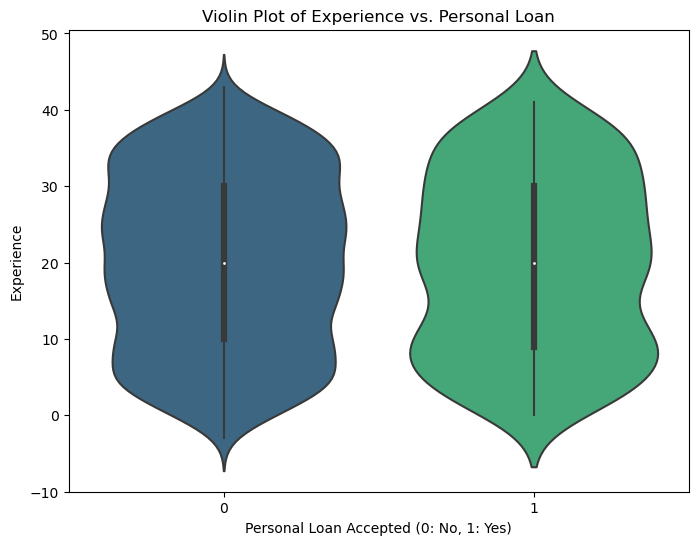

In [35]:
# Experience vs. Personal_Loan (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Personal_Loan', y='Experience', data=loan_df, palette='viridis')
plt.title('Violin Plot of Experience vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Experience')
plt.show()


#### Observation:  

* The violin plot reinforces that experience has little discriminatory power. The distributions are nearly identical.


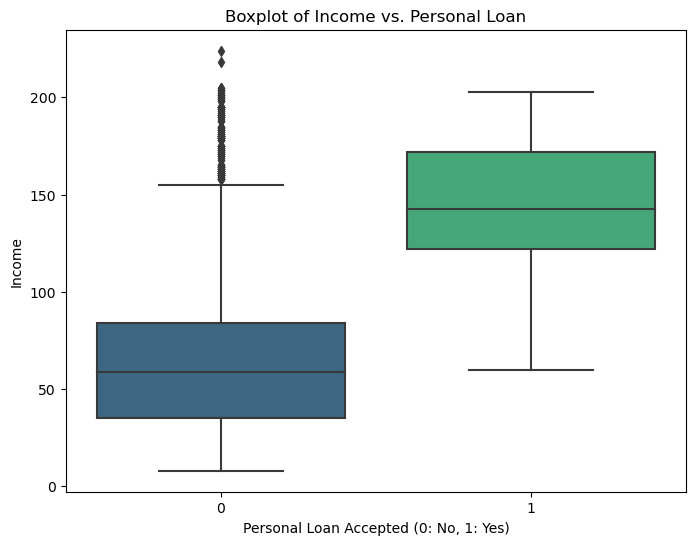

In [36]:
# Income vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=loan_df, palette='viridis')
plt.title('Boxplot of Income vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Income')
plt.show()

#### Observation:

* This plot shows a clear difference. Customers accepting personal loans have significantly higher incomes. The box for 'Personal_Loan' = 1 is much higher.


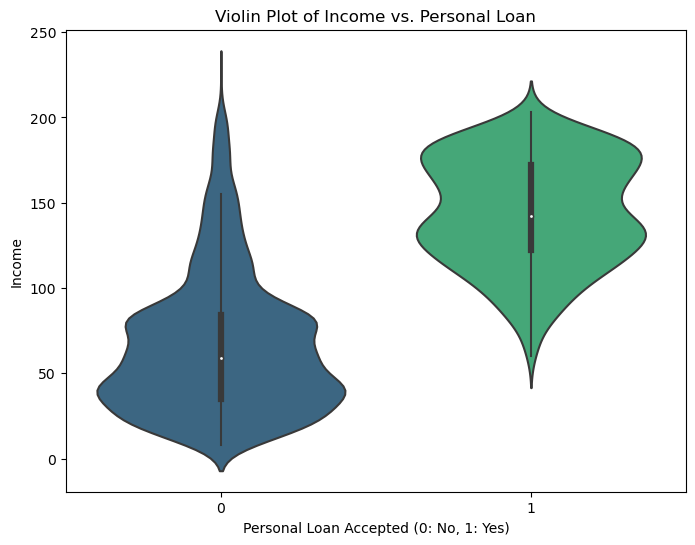

In [37]:
# Income vs. Personal_Loan (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Personal_Loan', y='Income', data=loan_df, palette='viridis')
plt.title('Violin Plot of Income vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Income')
plt.show()


#### Observation:

* The violin plot confirms that the income distribution for personal loan acceptors is shifted towards higher values, with a longer tail.


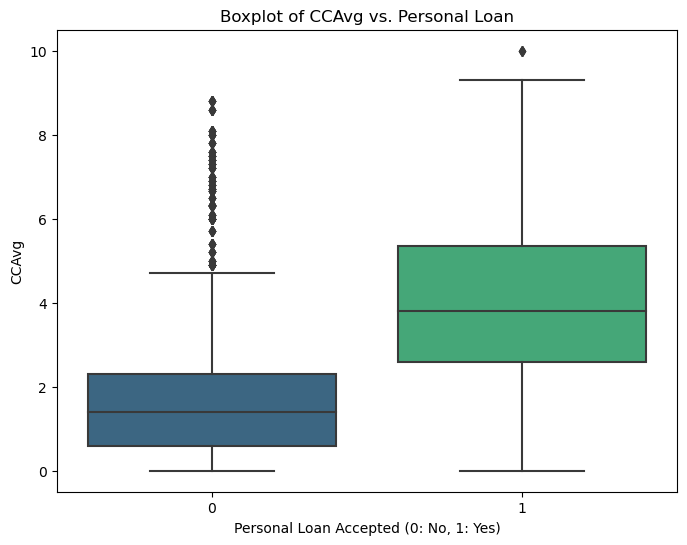

In [38]:
# CCAvg vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', data=loan_df, palette='viridis')
plt.title('Boxplot of CCAvg vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('CCAvg')
plt.show()

#### Observation:

* A slight difference is visible. Customers who accepted the loan tend to have slightly higher average credit card spending.


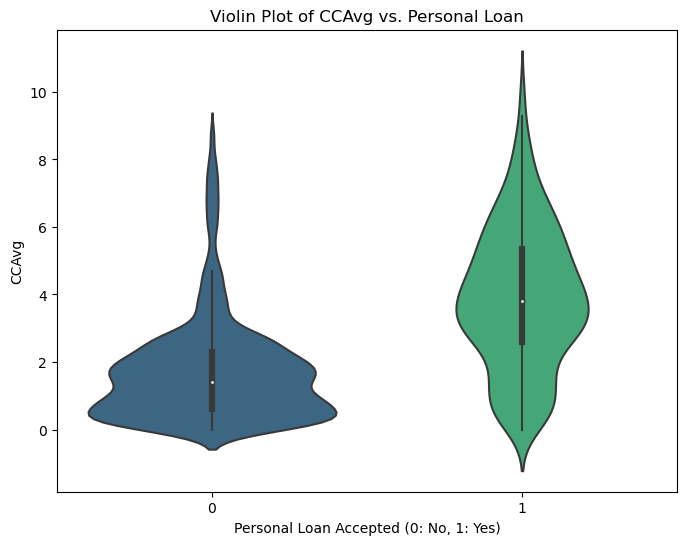

In [39]:
# CCAvg vs. Personal_Loan (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Personal_Loan', y='CCAvg', data=loan_df, palette='viridis')
plt.title('Violin Plot of CCAvg vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('CCAvg')
plt.show()

#### Observation:

* The violin plot shows a small shift in the CCAvg distribution, with loan acceptors having a slightly higher median and a bit more spread towards higher values.


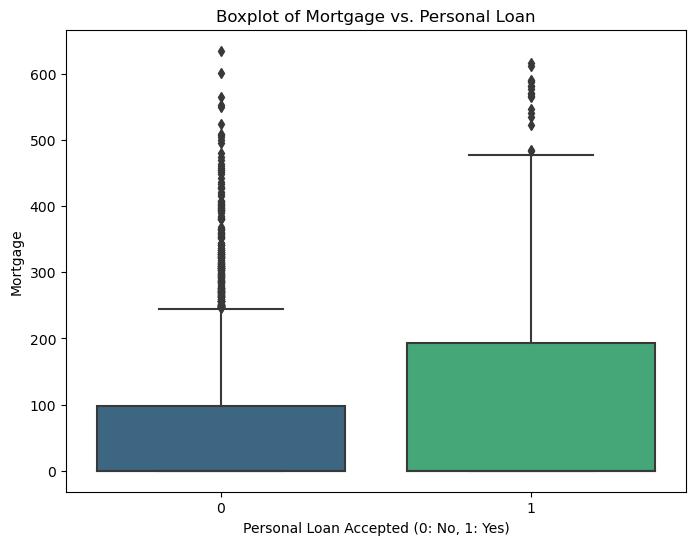

In [40]:
# Mortgage vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Mortgage', data=loan_df, palette='viridis')
plt.title('Boxplot of Mortgage vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Mortgage')
plt.show()

#### Observation:

* There's a very slight tendency for loan acceptors to have higher mortgage values, but the distributions overlap considerably.


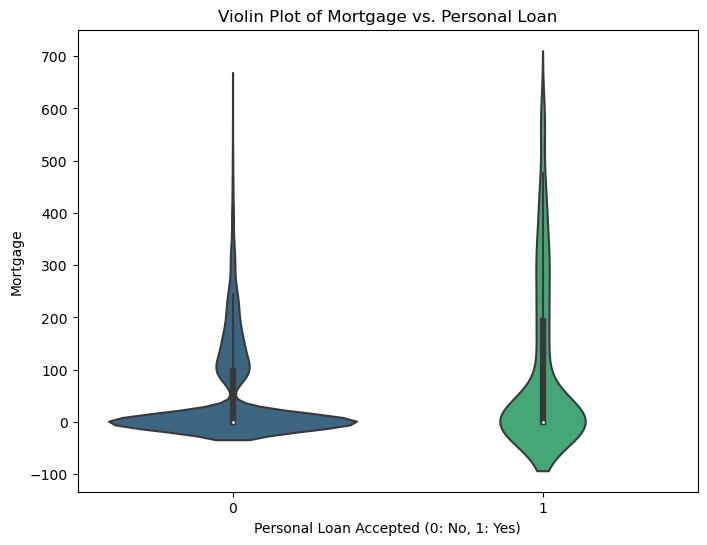

In [41]:
# Mortgage vs. Personal_Loan (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Personal_Loan', y='Mortgage', data=loan_df, palette='viridis')
plt.title('Violin Plot of Mortgage vs. Personal Loan')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Mortgage')
plt.show()

#### Observation:

* The violin plot confirms the subtle difference seen in the boxplot.


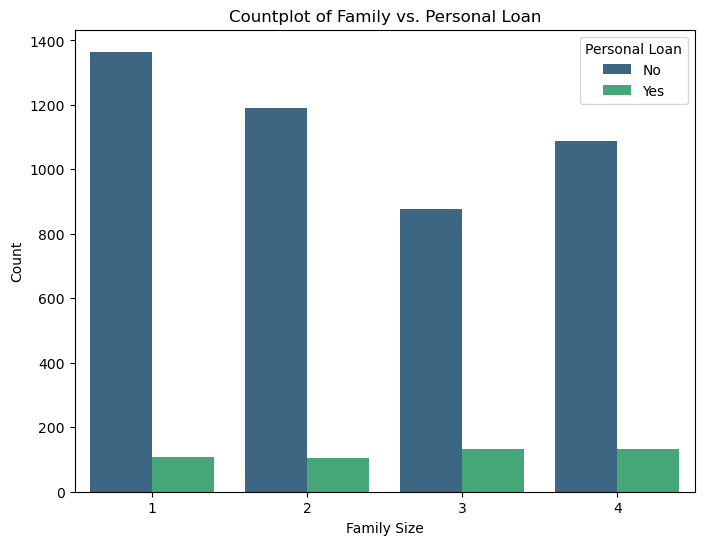


Percentage of Personal Loan Acceptance by Family:
 Personal_Loan        0        1
Family                         
1             92.73098  7.26902
2             91.82099  8.17901
3             86.83168 13.16832
4             89.03437 10.96563


In [42]:
#  Family vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of Family vs. Personal Loan')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['Family'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by Family:\n', cross_tab)

#### Observation:

* Family sizes 3 and 4 show a higher proportion of loan acceptance compared to sizes 1 and 2.


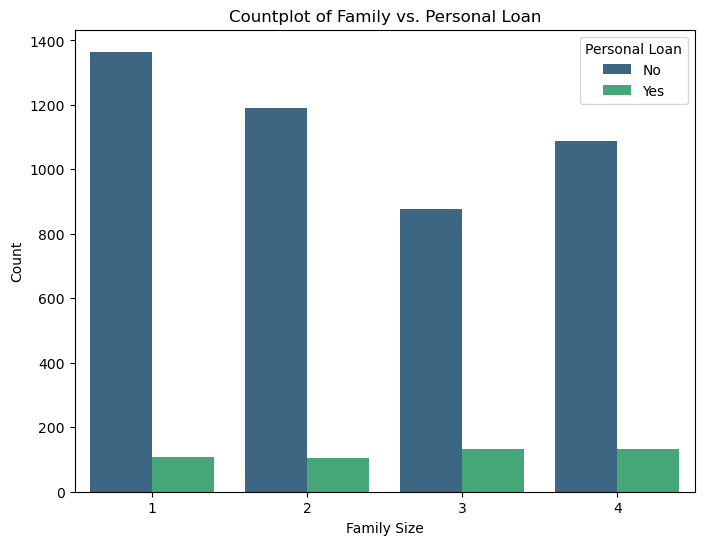


Percentage of Personal Loan Acceptance by Family:
 Personal_Loan        0        1
Family                         
1             92.73098  7.26902
2             91.82099  8.17901
3             86.83168 13.16832
4             89.03437 10.96563


In [43]:
#  Family vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='Family', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of Family vs. Personal Loan')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['Family'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by Family:\n', cross_tab)

#### Observation:

* Family sizes 3 and 4 show a higher proportion of loan acceptance compared to sizes 1 and 2.



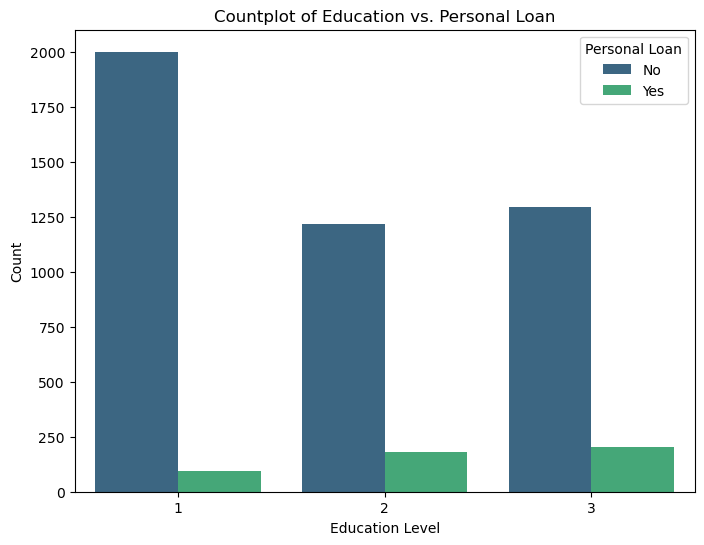


Percentage of Personal Loan Acceptance by Education:
 Personal_Loan        0        1
Education                      
1             95.56298  4.43702
2             87.02780 12.97220
3             86.34244 13.65756


In [44]:
# Education vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of Education vs. Personal Loan')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['Education'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by Education:\n', cross_tab)

#### Observation:

* Higher education levels are associated with higher loan acceptance rates.


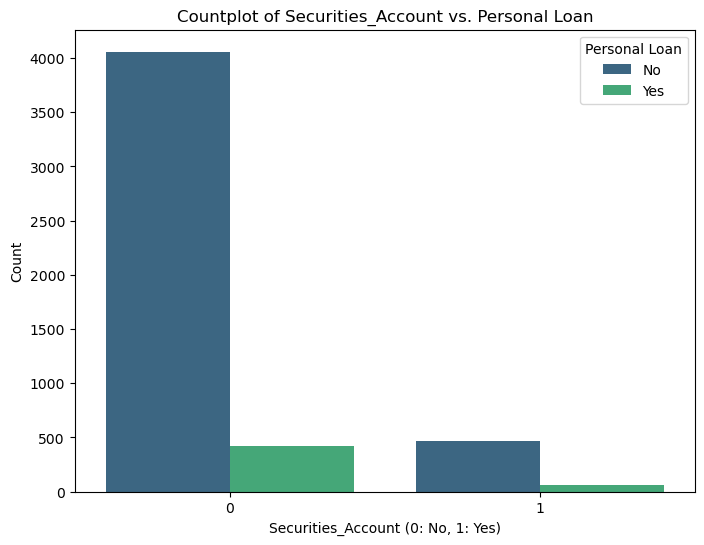


Percentage of Personal Loan Acceptance by Securities_Account:
 Personal_Loan             0        1
Securities_Account                  
0                  90.62081  9.37919
1                  88.50575 11.49425


In [45]:
# Securities_Account vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='Securities_Account', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of Securities_Account vs. Personal Loan')
plt.xlabel('Securities_Account (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['Securities_Account'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by Securities_Account:\n', cross_tab)

#### Observation:

* Customers with securities accounts show a slightly higher loan acceptance rate.


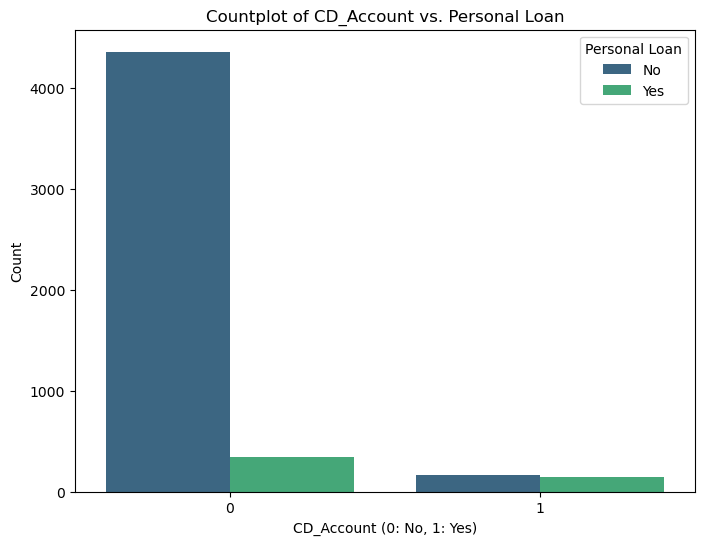


Percentage of Personal Loan Acceptance by CD_Account:
 Personal_Loan        0        1
CD_Account                     
0             92.76288  7.23712
1             53.64238 46.35762


In [46]:
# CD_Account vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='CD_Account', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of CD_Account vs. Personal Loan')
plt.xlabel('CD_Account (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['CD_Account'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by CD_Account:\n', cross_tab)

#### Observation:

* Having a CD account is strongly associated with a higher likelihood of accepting the personal loan.


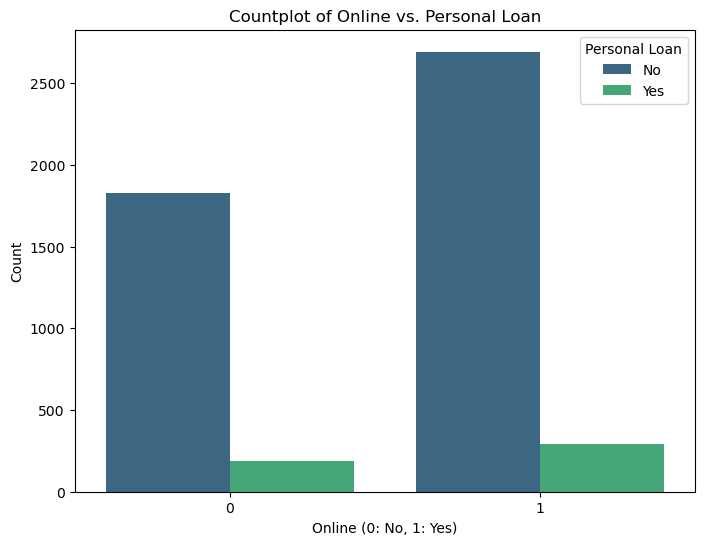


Percentage of Personal Loan Acceptance by Online:
 Personal_Loan        0       1
Online                        
0             90.62500 9.37500
1             90.24799 9.75201


In [47]:
# Online vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='Online', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of Online vs. Personal Loan')
plt.xlabel('Online (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['Online'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by Online:\n', cross_tab)

#### Observation:

*  Online banking usage has little to no impact on personal loan acceptance.


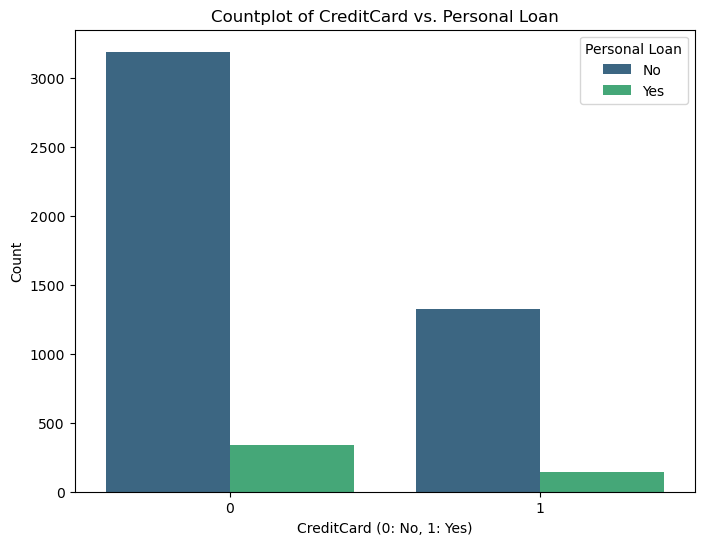


Percentage of Personal Loan Acceptance by CreditCard:
 Personal_Loan        0       1
CreditCard                    
0             90.45326 9.54674
1             90.27211 9.72789


In [48]:
# CreditCard vs. Personal_Loan
plt.figure(figsize=(8, 6))
sns.countplot(x='CreditCard', hue='Personal_Loan', data=loan_df, palette='viridis')
plt.title('Countplot of CreditCard vs. Personal Loan')
plt.xlabel('CreditCard (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

# Calculate and print percentage distribution
cross_tab = pd.crosstab(loan_df['CreditCard'], loan_df['Personal_Loan'], normalize='index') * 100
print('\nPercentage of Personal Loan Acceptance by CreditCard:\n', cross_tab)

#### Observation:

* Whether a customer has a credit card from another bank is not a significant factor in predicting personal loan acceptance.


## Data Pre-processing

In [49]:
# Copying the data to avoid touching original DF
df = loan_df.copy()

#preview it
df.sample(10)

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
441    442   52          27      43    93555       1 1.30000          2   
4470  4471   44          20     111    91911       2 5.30000          2   
1790  1791   44          20      43    92124       1 0.30000          3   
3659  3660   33           7      22    94002       1 0.40000          2   
1429  1430   31           5      35    95064       1 0.60000          3   
3967  3968   40          15      22    94306       1 0.60000          3   
4656  4657   47          21      38    91101       3 0.60000          2   
1603  1604   36           6     138    92152       1 7.00000          3   
357    358   38          14      42    94610       1 2.00000          2   
334    335   48          23      45    95053       1 1.30000          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
441          0              0                   1           0       1   
4470         0              1                   0           0       1   
1790         0              0                   1           0       0   
3659         0              0                   0           0       0   
1429       171              0                   0           0       0   
3967         0              0                   0           0       1   
4656         0              0                   1           0       0   
1603        86              1                   0           0       1   
357         81              0                   0           0       1   
334          0              0                   0           0       1   

      CreditCard  
441            0  
4470           0  
1790           1  
3659           0  
1429           0  
3967           0  
4656           0  
1603           0  
357            0  
334            0

### Zipcode

Dropping Zicode column as it has very low correlation with the dependent variable

In [50]:
# Dropping Zicode column as it has very low correlation with the dependent variable
df.drop("ZIPCode",axis=1,inplace=True)

### Experience

* Expereince has negative values which are needed to be handled

In [51]:
# Checking how many negative values on the experience column
print("We have %2d negative values on the experience column" % df[df['Experience'] < 0].shape[0])

We have 52 negative values on the experience column


In [52]:
#Convert all to Zeros
df['Experience'] = df['Experience'].apply(lambda x : 0 if x < 0 else x)
#Input with median
df['Experience'] = df['Experience'].replace(0,df['Experience'].median())

In [53]:
# Checking how many negative values on the experience column after treatment
print("We now have %2d negative values on the experience column after treatment" % df[df['Experience'] < 0].shape[0])


We now have  0 negative values on the experience column after treatment


## Model Building - Decision Tree

In [54]:
df.head()

ID  Age  Experience  Income  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49       4 1.60000          1         0   
1   2   45          19      34       3 1.50000          1         0   
2   3   39          15      11       1 1.00000          1         0   
3   4   35           9     100       1 2.70000          2         0   
4   5   35           8      45       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

#### Train and Test Split

In [55]:
X = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [56]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)

 Percentage of classes in training set : 
0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64

 Percentage of classes in test set : 
0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64


## Model Evaluation Criteria

* When evaluating the model’s performance, we consider two types of incorrect predictions:

* The model predicts that a customer will take a personal loan, but the customer actually does not.

* The model predicts that a customer will not take a personal loan, but the customer actually does.

#### Key Concern: False Negatives
* The second type of error is more critical. Since AllLife Bank aims to grow its personal loan segment, each customer who is genuinely interested in taking a loan is valuable. Therefore, it’s crucial to minimize false negatives, where we fail to identify a potential loan customer.

#### How to Minimize False Negatives
* To reduce such missed opportunities, we need to maximize the Recall score. A higher Recall means the model is better at identifying actual loan takers, which aligns with the bank’s objective of customer acquisition in the loan category.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [59]:
# Building a Decision Tree using default 'gini' criteria to split

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)  # defining higher weightage to 1 in the dependent variable

In [60]:
# Fitting the model on the training set

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Model performance on training set

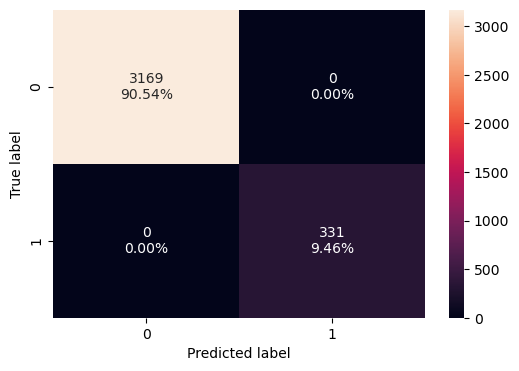

In [61]:
confusion_matrix_sklearn(model, X_train, y_train)

In [62]:
decision_tree_perf_train = model_performance_classification(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

### Observations

* The decision tree is fully grown i.e hence the model is overfit and it is able to classify all the data points on the training set with no errors


### Model performance on test set

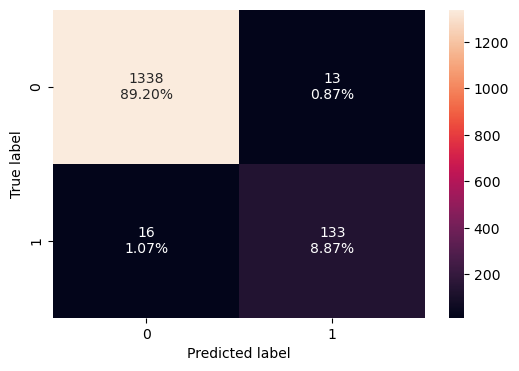

In [63]:
confusion_matrix_sklearn(model, X_test, y_test)

In [64]:
decision_tree_perf_test = model_performance_classification(model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.98067 0.89262    0.91096 0.90169

### Visualizing the Decision Tree

In [65]:
# Creating a list of column names

feature_names = X_train.columns.to_list()

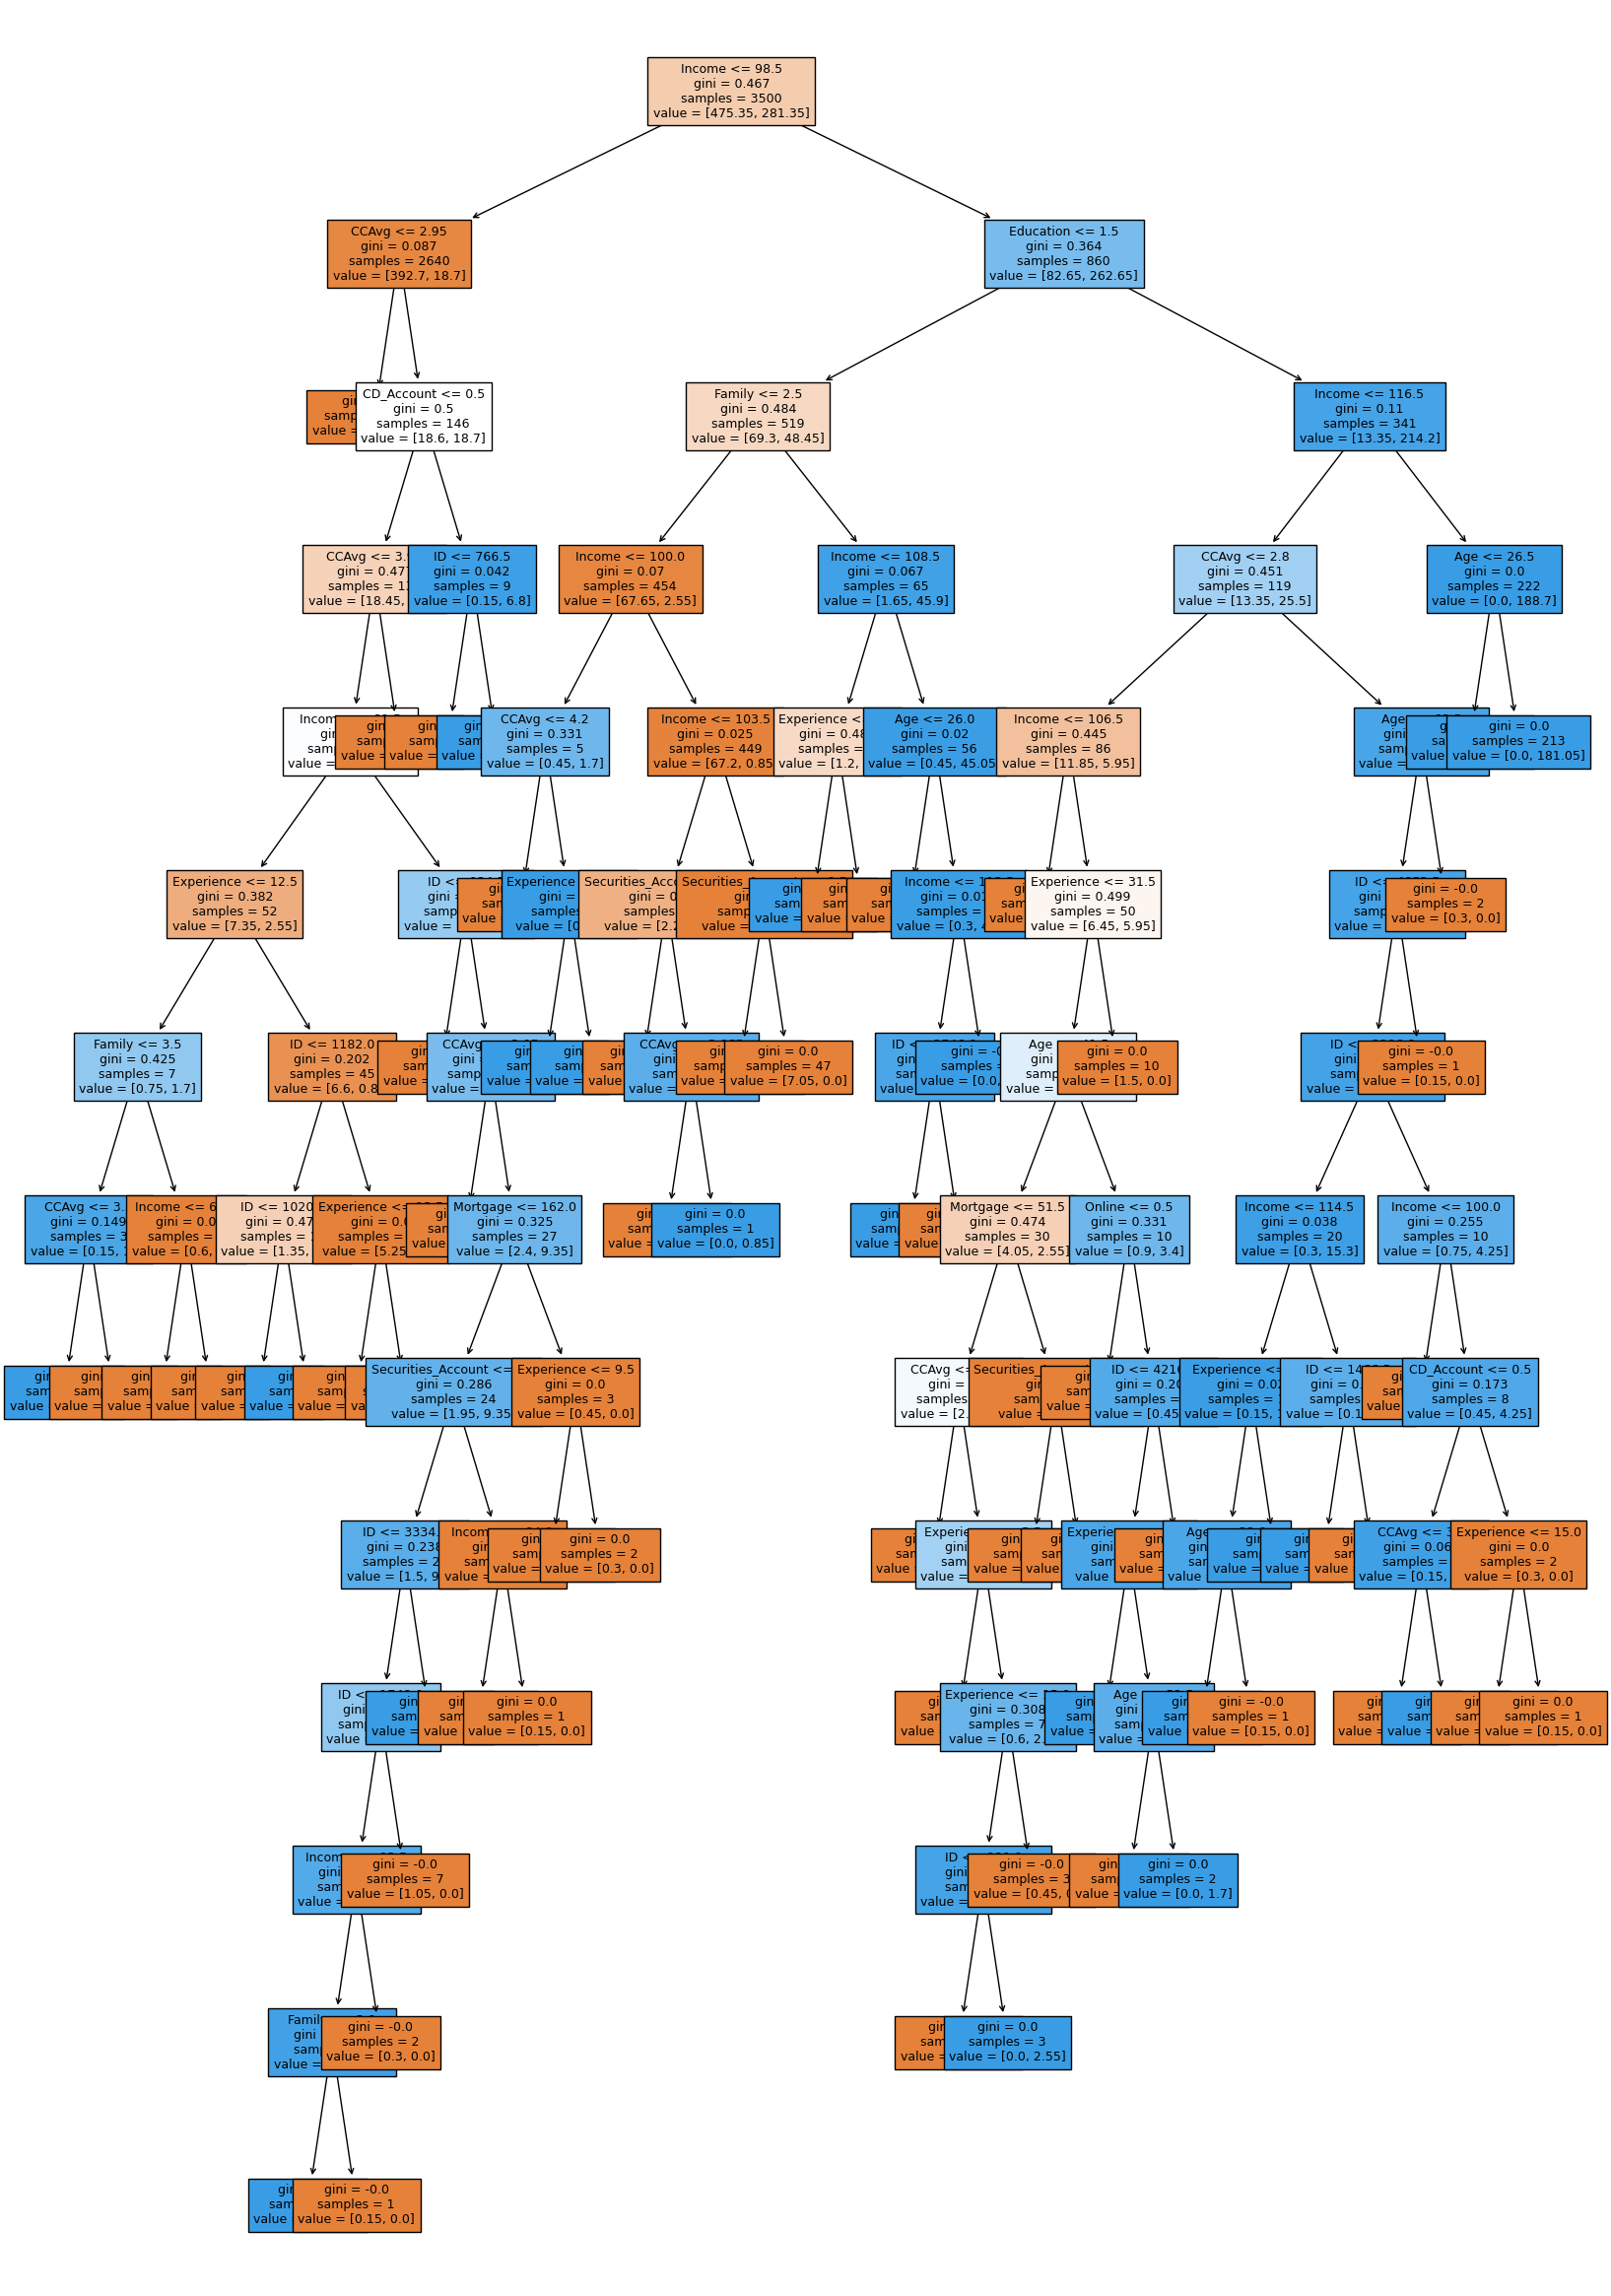

In [66]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [67]:
# Text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- Income <= 66.50
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  66.50
|   |   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |--- Experience >  12.50
|   |   |   |   |   |   |--- ID <= 1182.00
|   |   |   |   |   |   |   |--- ID <= 1020.50
|   |   |   |   |   |   |   |   |--- weights: [1.35, 0.

In [68]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.59064
Family             0.14140
Education          0.12326
CCAvg              0.08345
ID                 0.01900
Experience         0.01291
CD_Account         0.01248
Age                0.00695
Securities_Account 0.00458
Mortgage           0.00353
Online             0.00178
CreditCard         0.00000


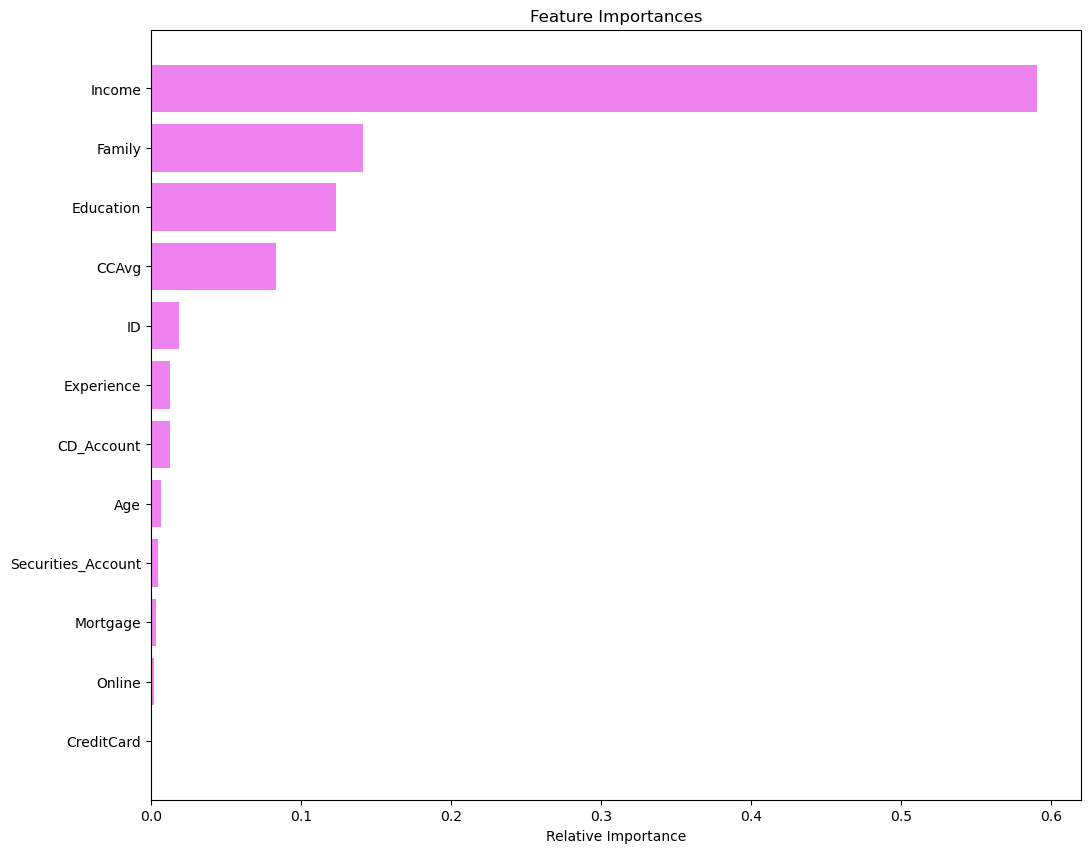

In [69]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Model performance improvement


#### GridSearch for Hyperparameter tuning to reduce overfitting

In [70]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 0: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

In [71]:
decision_tree_tune_perf_train = model_performance_classification(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99200 0.95166    0.96330 0.95745

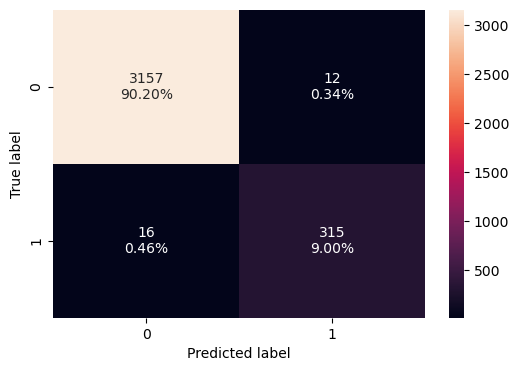

In [72]:
confusion_matrix_sklearn(estimator, X_train, y_train)

### Model performance on test set

In [73]:
decision_tree_tune_perf_test = model_performance_classification(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.98067 0.89262    0.91096 0.90169

#### Visualizing the Decision Tree

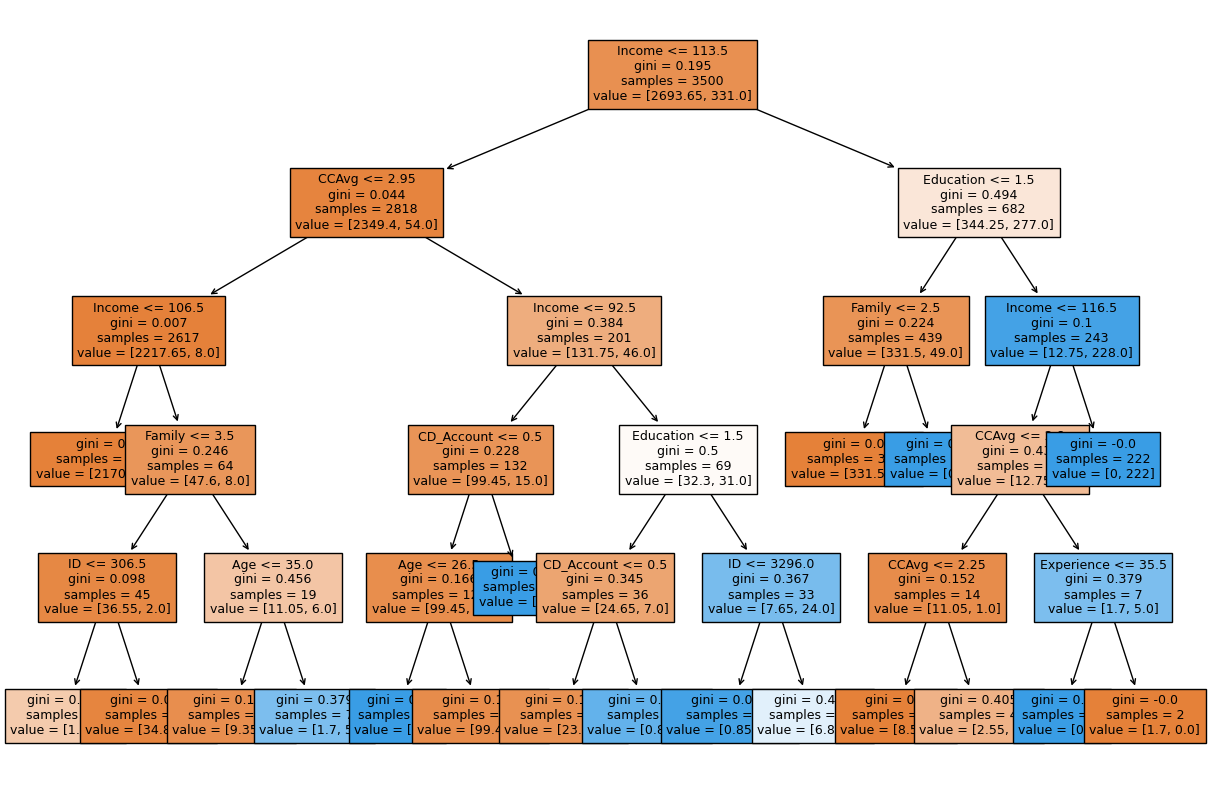

In [74]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [75]:
# Test report showing the rules of a decision tree

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2170.05, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 306.50
|   |   |   |   |   |--- weights: [1.70, 1.00] class: 0
|   |   |   |   |--- ID >  306.50
|   |   |   |   |   |--- weights: [34.85, 1.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 35.00
|   |   |   |   |   |--- weights: [9.35, 1.00] class: 0
|   |   |   |   |--- Age >  35.00
|   |   |   |   |   |--- weights: [1.70, 5.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- weights: [99.45, 9.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.5

In [76]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Education          0.37673
Income             0.37514
Family             0.15958
CCAvg              0.04673
CD_Account         0.02201
Age                0.00930
ID                 0.00588
Experience         0.00463
Mortgage           0.00000
Securities_Account 0.00000
Online             0.00000
CreditCard         0.00000


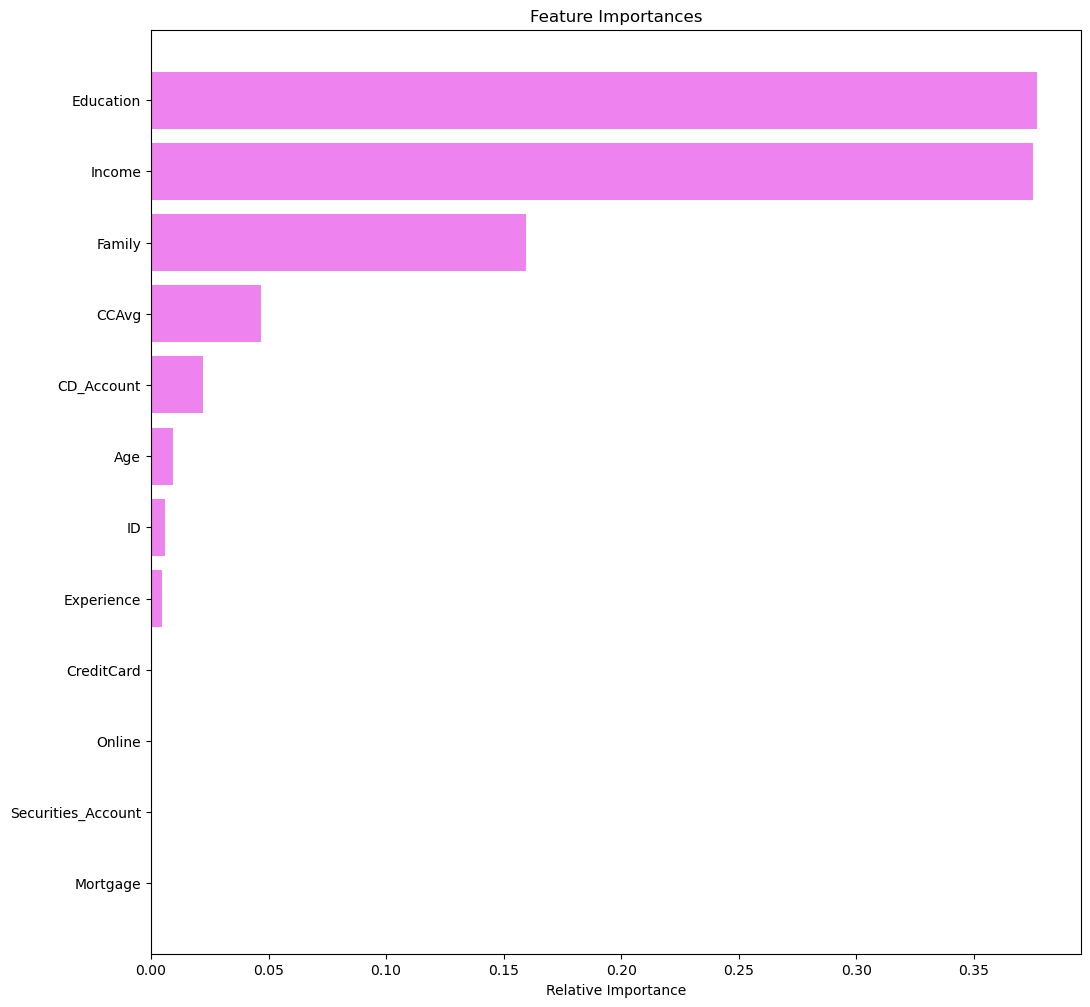

In [77]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning

In [78]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [79]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.00000    -0.00000
1      0.00000    -0.00000
2      0.00000    -0.00000
3      0.00000    -0.00000
4      0.00000    -0.00000
5      0.00000    -0.00000
6      0.00000    -0.00000
7      0.00000    -0.00000
8      0.00000    -0.00000
9      0.00000    -0.00000
10     0.00019     0.00078
11     0.00034     0.00111
12     0.00035     0.00217
13     0.00036     0.00253
14     0.00037     0.00290
15     0.00038     0.00328
16     0.00038     0.00367
17     0.00039     0.00405
18     0.00039     0.00523
19     0.00046     0.00706
20     0.00067     0.00773
21     0.00069     0.00842
22     0.00083     0.00925
23     0.00091     0.01016
24     0.00094     0.01110
25     0.00094     0.01299
26     0.00095     0.01584
27     0.00099     0.02079
28     0.00100     0.02278
29     0.00101     0.02379
30     0.00108     0.02596
31     0.00132     0.02727
32     0.00164     0.02891
33     0.00172     0.03063
34     0.00184     0.03247
35     0.00229     0.03476
36     0.00274     0.03750
37     0.00334     0.04084
38     0.00353     0.04436
39     0.00514     0.04950
40     0.00901     0.05851
41     0.01005     0.06857
42     0.02253     0.09110
43     0.06112     0.21334
44     0.25380     0.46714

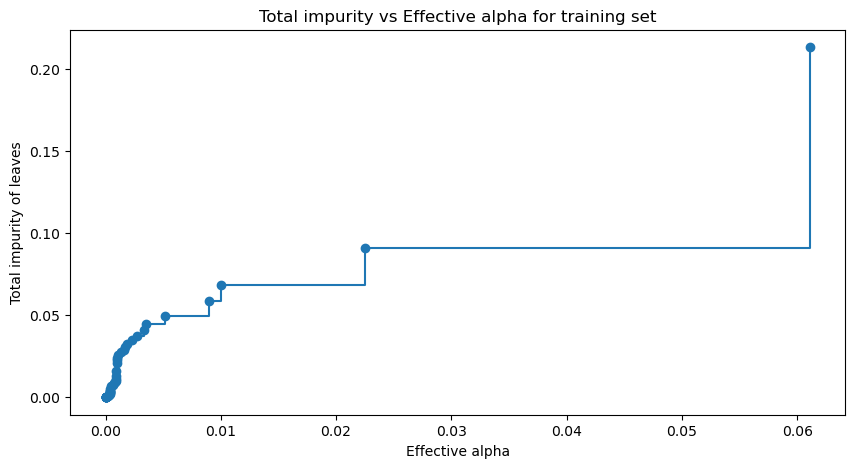

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

In [81]:
# Training the decision tree using the effective alphas

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is : {} with ccp_alpha : {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 1 with ccp_alpha : 0.2537957148948088


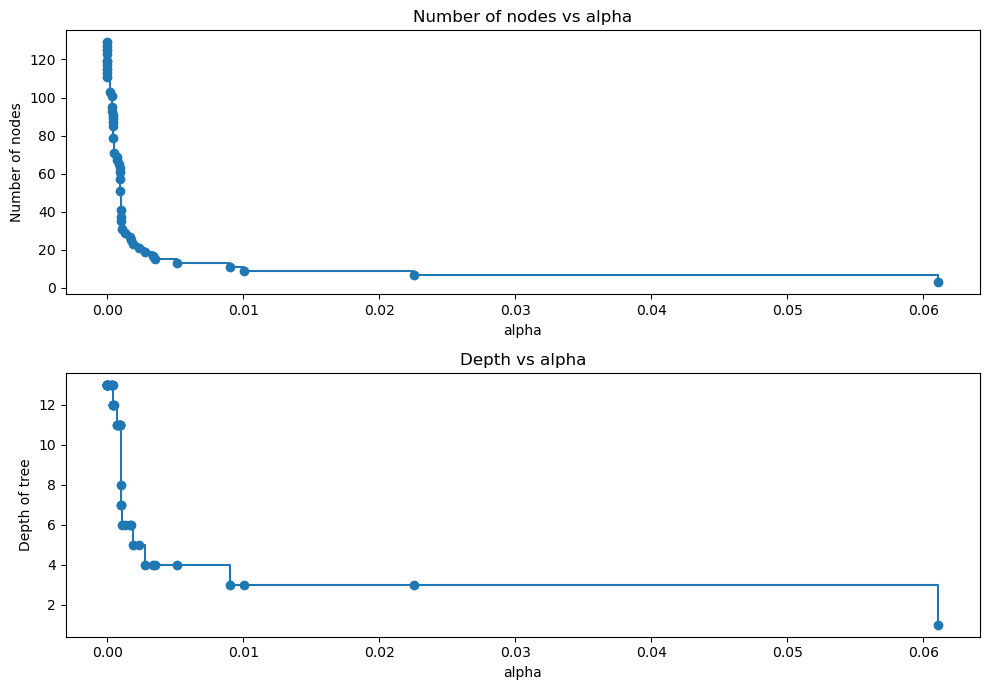

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [83]:
recall_train = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [84]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [85]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

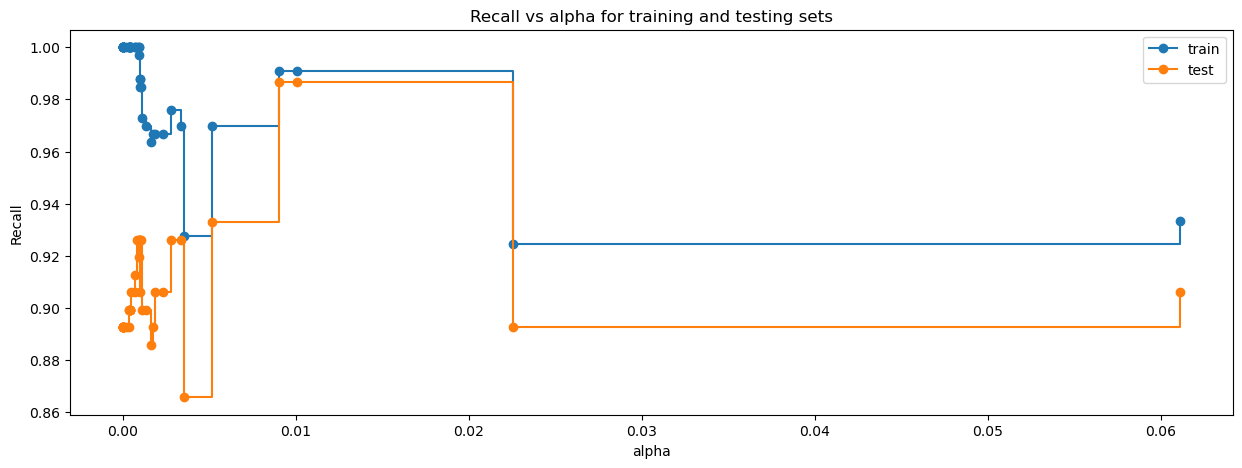

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# Creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508094,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [88]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508094,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Model performance on training set

In [89]:
decision_tree_postpruned_perf_train = model_performance_classification(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.93514 0.99094    0.59420 0.74292

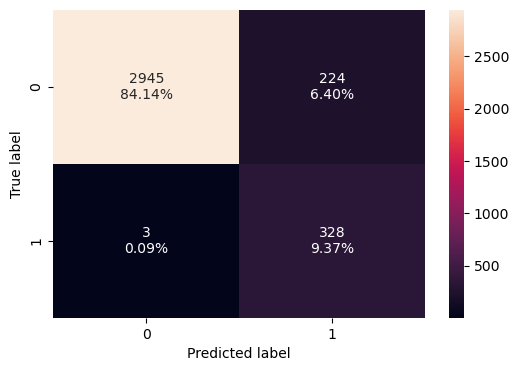

In [90]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Model performance on test set

In [91]:
decision_tree_postpruned_perf_test = model_performance_classification(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.93933 0.98658    0.62288 0.76364

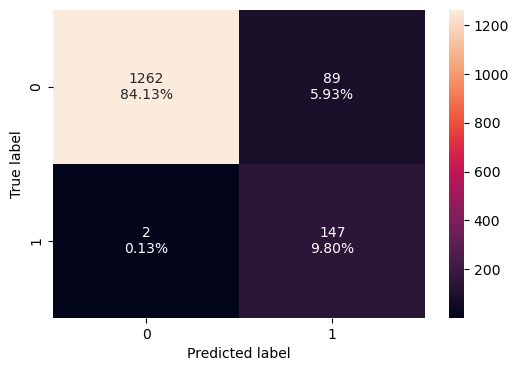

In [92]:
confusion_matrix_sklearn(best_model, X_test, y_test)

### Visualizing the Decision Tree

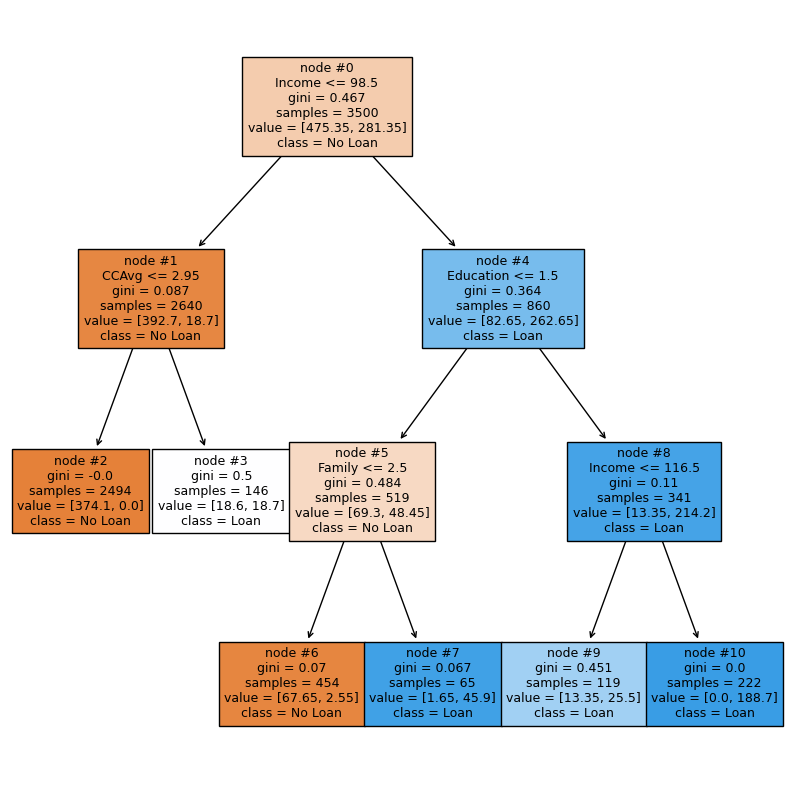

In [93]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=['No Loan', 'Loan'],
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [94]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [95]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                       Imp
Income             0.64570
Family             0.15824
Education          0.14091
CCAvg              0.05514
ID                 0.00000
Age                0.00000
Experience         0.00000
Mortgage           0.00000
Securities_Account 0.00000
CD_Account         0.00000
Online             0.00000
CreditCard         0.00000


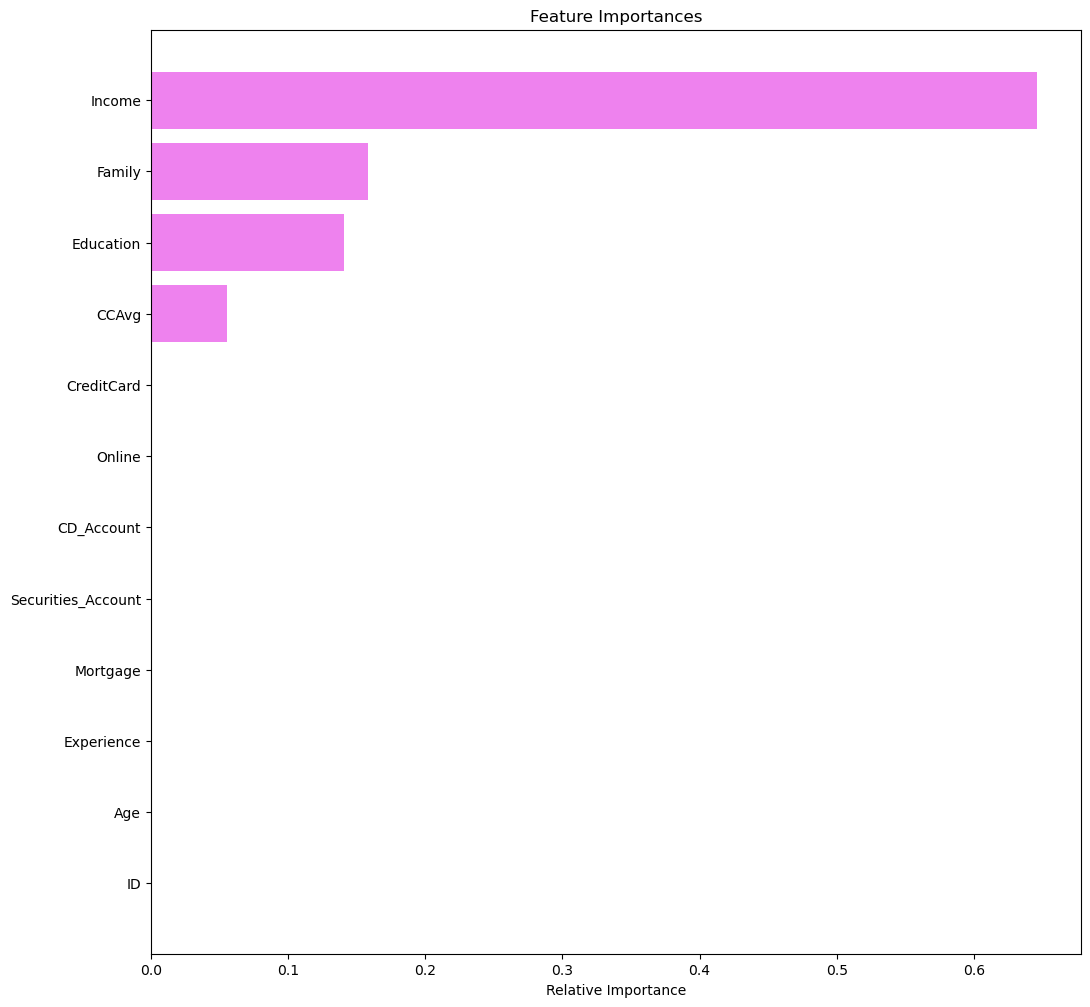

In [96]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison 

In [97]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison : ")
models_train_comp_df

Training performance comparison : 


Decision Tree Sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 1.00000                      0.99200   
Recall                   1.00000                      0.95166   
Precision                1.00000                      0.96330   
F1                       1.00000                      0.95745   

           Decision Tree (Post-Pruning)  
Accuracy                        0.93514  
Recall                          0.99094  
Precision                       0.59420  
F1                              0.74292

In [98]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
  
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison : ")
models_test_comp_df

Test performance comparison : 


Decision Tree Sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.98067                      0.98067   
Recall                   0.89262                      0.89262   
Precision                0.91096                      0.91096   
F1                       0.90169                      0.90169   

           Decision Tree (Post-Pruning)  
Accuracy                        0.93933  
Recall                          0.98658  
Precision                       0.62288  
F1                              0.76364

## Observations & Conclusion

* Decision tree model with pre-pruning has given the best recall score on training data
* Decision tree model with post-pruning has given the best recall score on test set
* The tree with post pruning is not complex and is easy to interpret
* Outliers and multicollinear variables were not treated since they have no effect on the Decision Tree
* Highest Recall in the test set is 0.986, with a post-pruned decision tree, giving comparable values in both train and test sets
* Able to interpret that Income, Family, Education and CCAvg hold more importance in predicting if a customer will borrow a personal loan

## Targeted Marketing Recommendations



To enhance the success rate of personal loan campaigns, the marketing team should focus on customer segments that exhibit the following characteristics:

- **Annual income above $120,000**  
  Customers with higher income levels typically have better repayment capacity and financial reliability.

- **Education level: Graduate or Advanced/Professional**  
  Higher educational attainment often correlates with financial awareness and a stronger likelihood of loan acceptance.

- **Family size of three or more**  
  Larger households may have greater financial needs, making them more inclined to consider personal loans.

- **Ownership of a Certificate of Deposit (CD) account**  
  These customers show strong banking relationships and lower credit risk due to available collateral.

- **Average credit card spending above $2,500 per month**  
  High spenders may have short-term liquidity needs that personal loans can fulfill.

- **Active mortgage account**  
  Individuals with home loans may seek additional funds for home improvement, debt consolidation, or other needs.

- **Age above 35 years**  
  Mid-aged customers are often financially active and managing various responsibilities.

- **More than nine years of professional experience**  
  Career stability often reflects steady income and greater eligibility for loans.

- **Residence in key counties: Los Angeles, Santa Clara, San Diego, and Riverside**  
  These regions have shown favorable engagement with personal loan products based on model outcomes.

---

*Targeting these segments is likely to improve loan campaign conversion rates while managing risk effectively.*
